<a href="https://colab.research.google.com/github/ShubhamPrakash108/ICDEC_2024_Challenge_Vehicle_Detection_in_Various_Weather_Conditions-VDVWC-/blob/main/ICDEC_2024_Challenge_Vehicle_Detection_in_Various_Weather_Conditions(VDVWC)_experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to my notebook. This notebook contains a comprehensive collection of experimentation using different hyperparameters.

In [ ]:
#importing the data to colab notebook
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shubhamprakash108/dataset

In [ ]:
#Unzipping the data folder
import zipfile
import os

zip_file_path = '/content/dataset.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()


Visualizing the random images and it's annotation.

In [ ]:
import os
import random
import cv2
import matplotlib.pyplot as plt

# Define paths
image_folder = '/content/Dataset folder/train/images'
label_folder = '/content/Dataset folder/train/labels'

# Get list of images and labels
images = os.listdir(image_folder)
labels = os.listdir(label_folder)



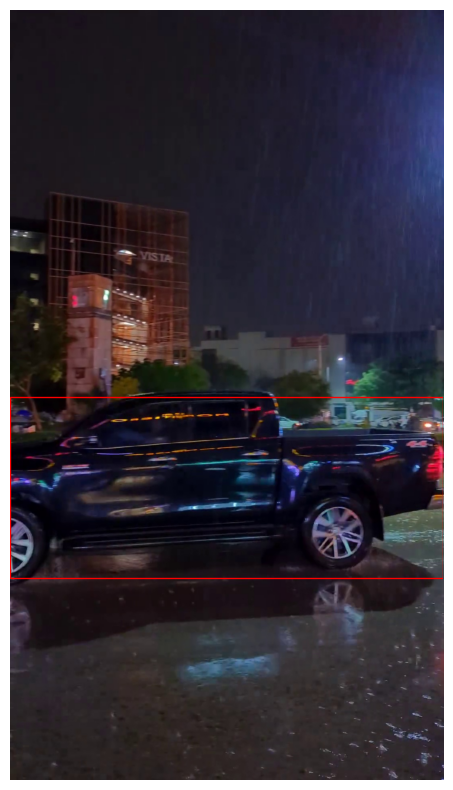

In [ ]:
# Choose a random image
random_image = random.choice(images)
image_path = os.path.join(image_folder, random_image)

# Corresponding label file
label_file = random_image.replace('.jpg', '.txt')
label_path = os.path.join(label_folder, label_file)

# Read the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Read the labels
with open(label_path, 'r') as file:
    label_data = file.readlines()

# Plot the image
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Plot the bounding boxes
for label in label_data:
    label = label.strip().split()
    class_id, x_center, y_center, width, height = map(float, label)

    # Convert YOLO format to bounding box coordinates
    img_height, img_width, _ = image.shape
    x_center *= img_width
    y_center *= img_height
    width *= img_width
    height *= img_height

    x_min = int(x_center - width / 2)
    x_max = int(x_center + width / 2)
    y_min = int(y_center - height / 2)
    y_max = int(y_center + height / 2)

    # Draw rectangle
    rect = plt.Rectangle((x_min, y_min), width, height, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

plt.show()

Creating .yaml file.

In [ ]:
dataset_yaml = """
train: /content/Dataset folder/train/images
val: /content/Dataset folder/val/images
nc: 15  # number of classes
names: ['car','bike','auto','rickshaw','cycle','bus','minitruck','truck','van','taxi','motorvan','toto','train','boat','cycle van']  # class names
"""


with open('/content/Dataset folder/dataset.yaml', 'w') as file:
    file.write(dataset_yaml)


In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 31.3/78.2 GB disk)


In [ ]:
import torch
from ultralytics import YOLO

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model_train = YOLO('yolov8n.yaml').to(device)
data_yaml_path = "/content/Dataset folder/dataset.yaml"

Hyperparameter Tuning code:

In [ ]:
model_train.tune(data=data_yaml_path, epochs=10, iterations=10, optimizer="AdamW",batch=32)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune2'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune2/tune_scatter_plots.png
Saved runs/detect/tune2/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (912.71s)
Tuner: Results saved to runs/detect/tune2
Tuner: Best fitness=0.06768 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.40614, 'metrics/recall(B)': 0.15461, 'metrics/mAP50(B)': 0.16118, 'metrics/mAP50-95(B)': 0.05729, 'val/box_loss': 2.23186, 'val/cls_loss

In [ ]:
import os
from zipfile import ZipFile

# Function to zip a folder
def zip_folder(folder_path, zip_path):
    with ZipFile(zip_path, 'w') as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                zipf.write(os.path.join(root, file),
                           os.path.relpath(os.path.join(root, file),
                                           os.path.join(folder_path, '..')))

# Example usage:
# Folder path (adjust this to your folder's path)
folder_path = '/content/runs'  # Replace with your folder path in Colab

# Zip file path and name
zip_path = '/content/sample_data.zip'  # Replace with desired zip file path and name

# Call the function to zip the folder
zip_folder(folder_path, zip_path)

print(f'Folder "{folder_path}" zipped successfully to "{zip_path}"')



Folder "/content/runs" zipped successfully to "/content/sample_data.zip"


Model experiment summary:- https://drive.google.com/file/d/1s4JUCyCmYu-fj_pFK7wqOgg9QNOUVpE9/view?usp=sharing

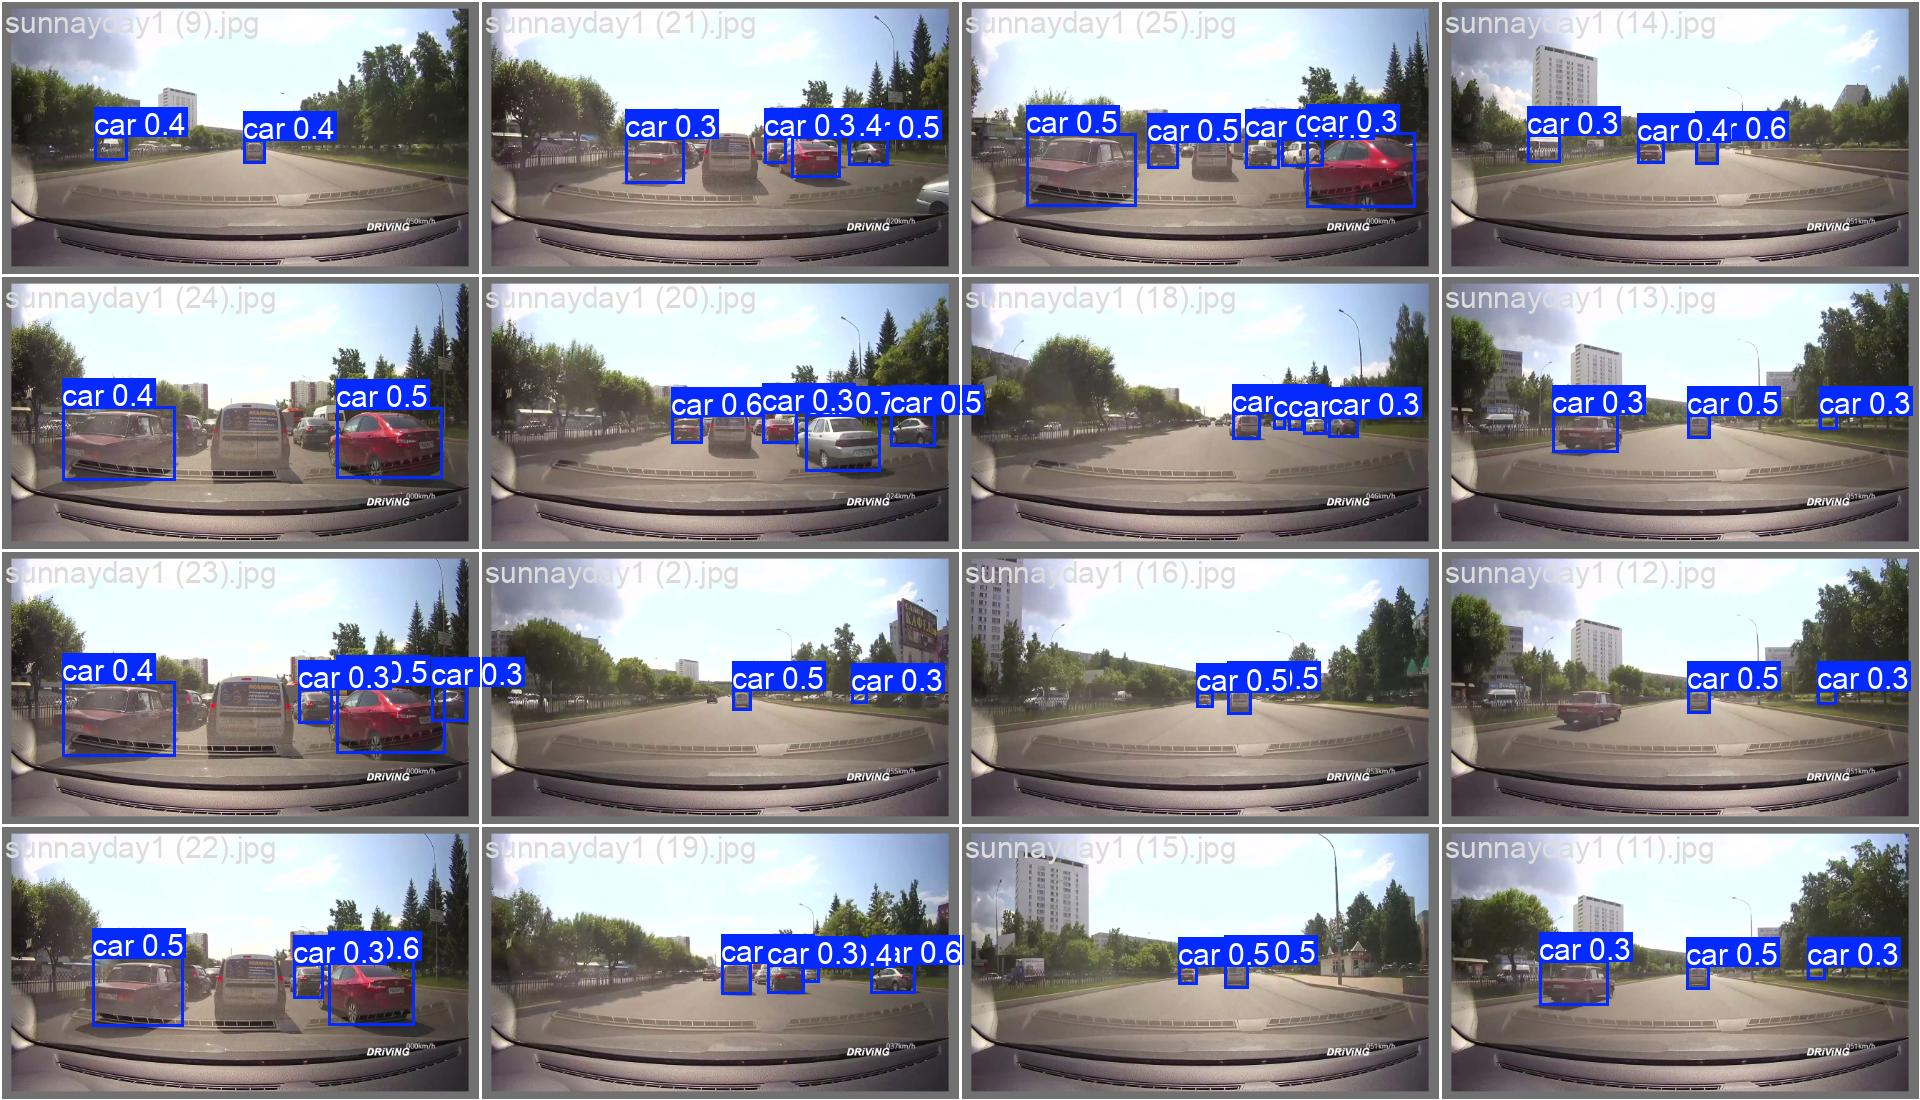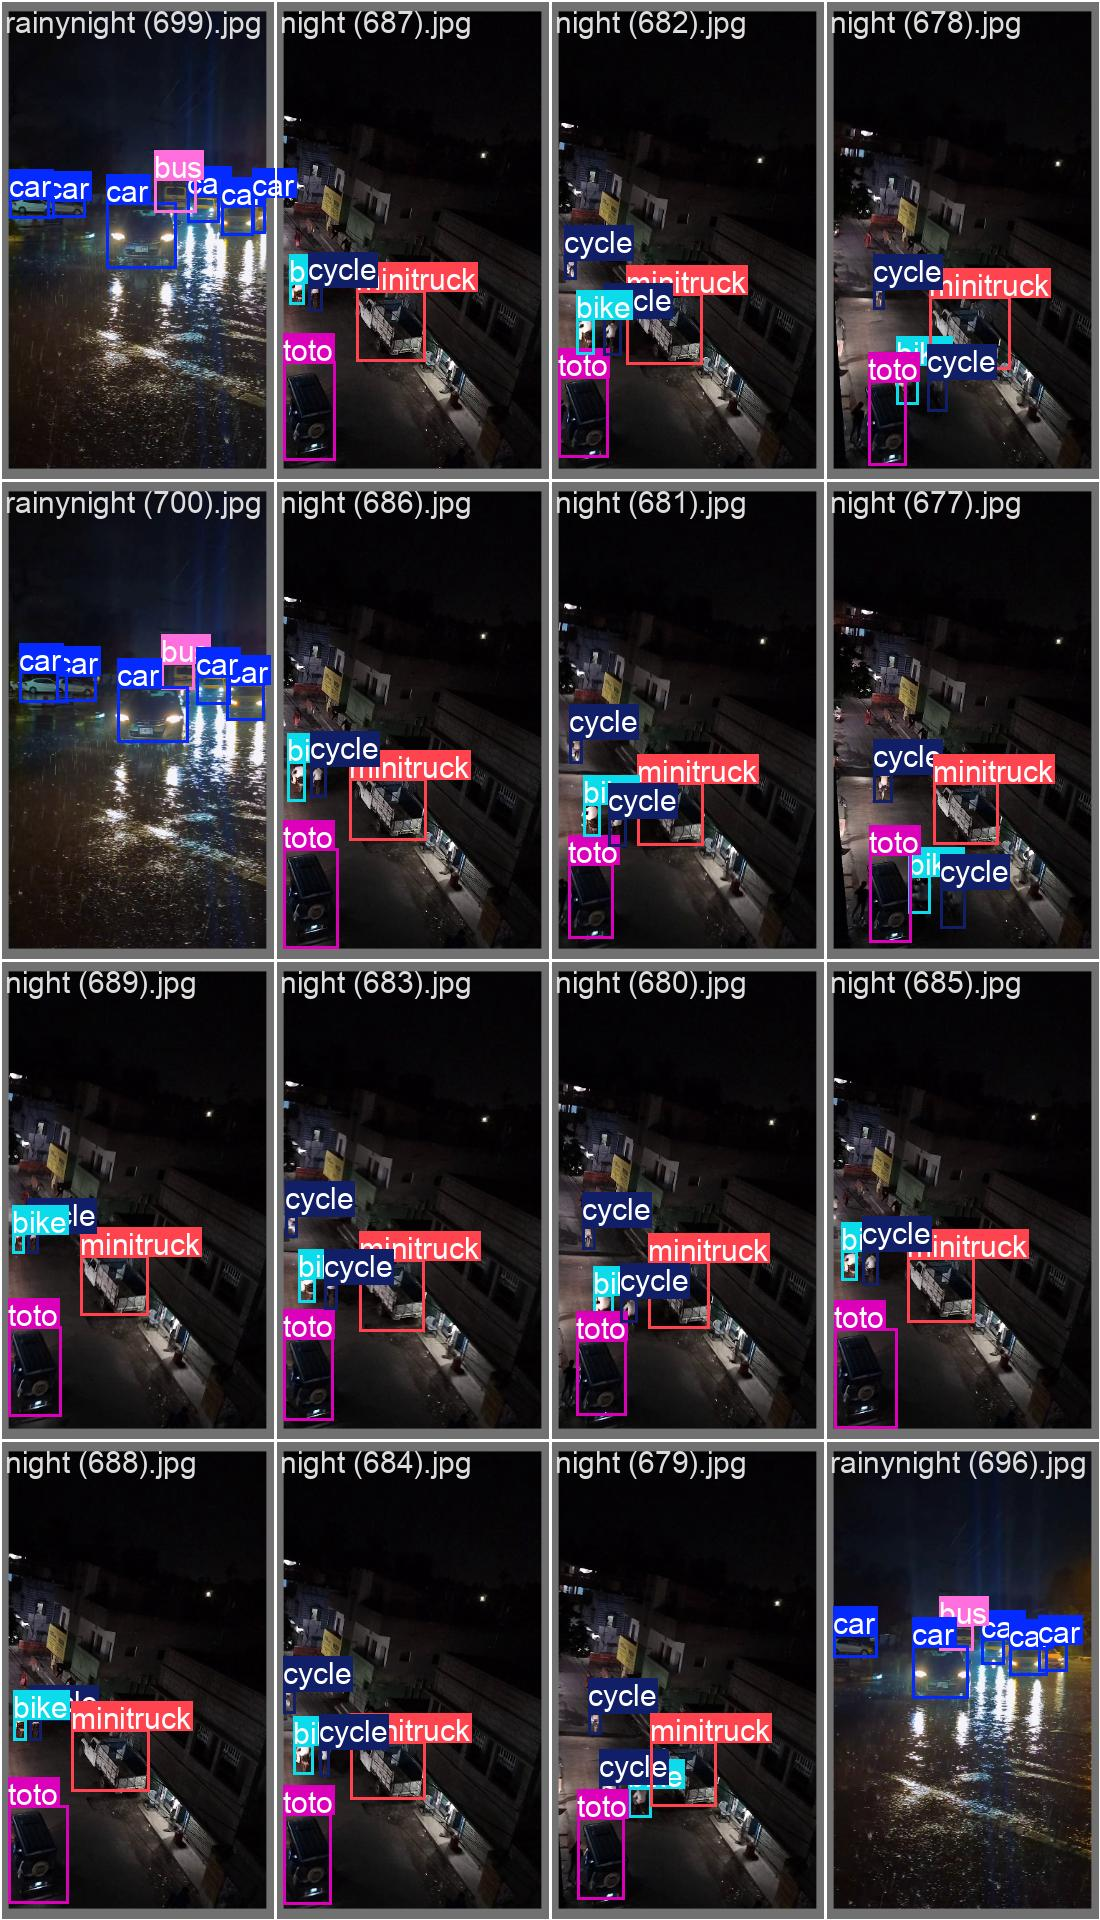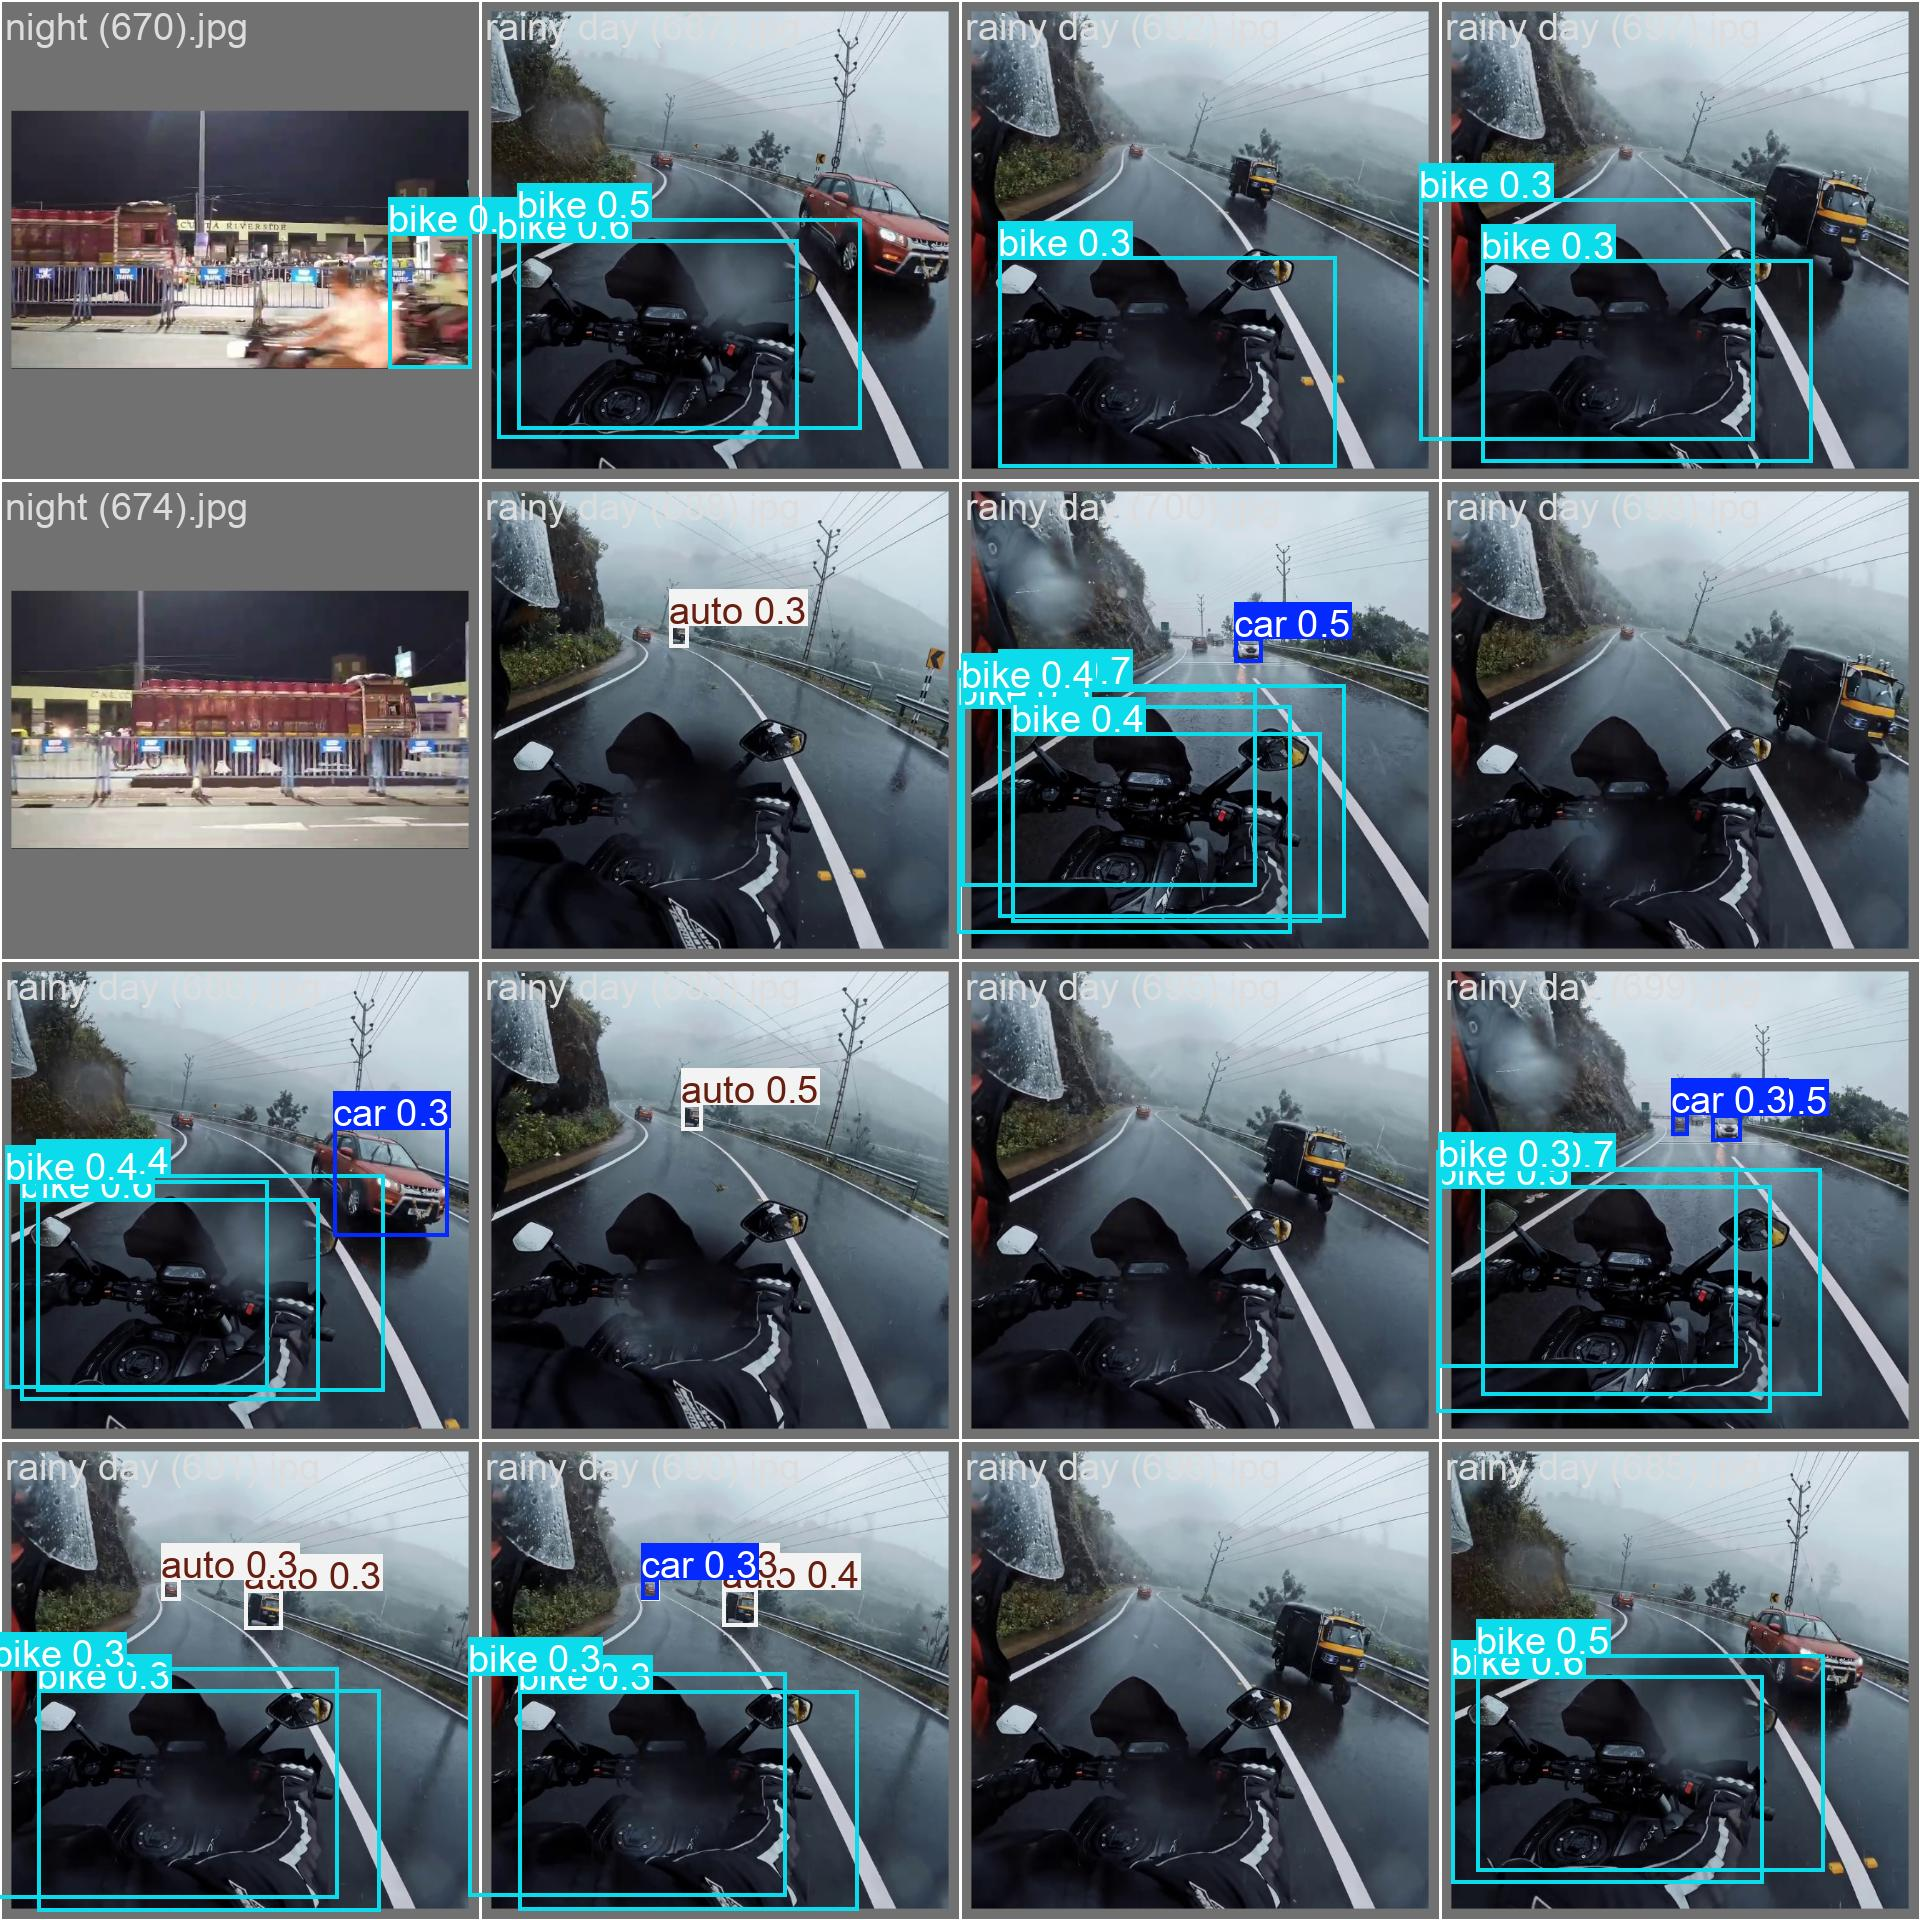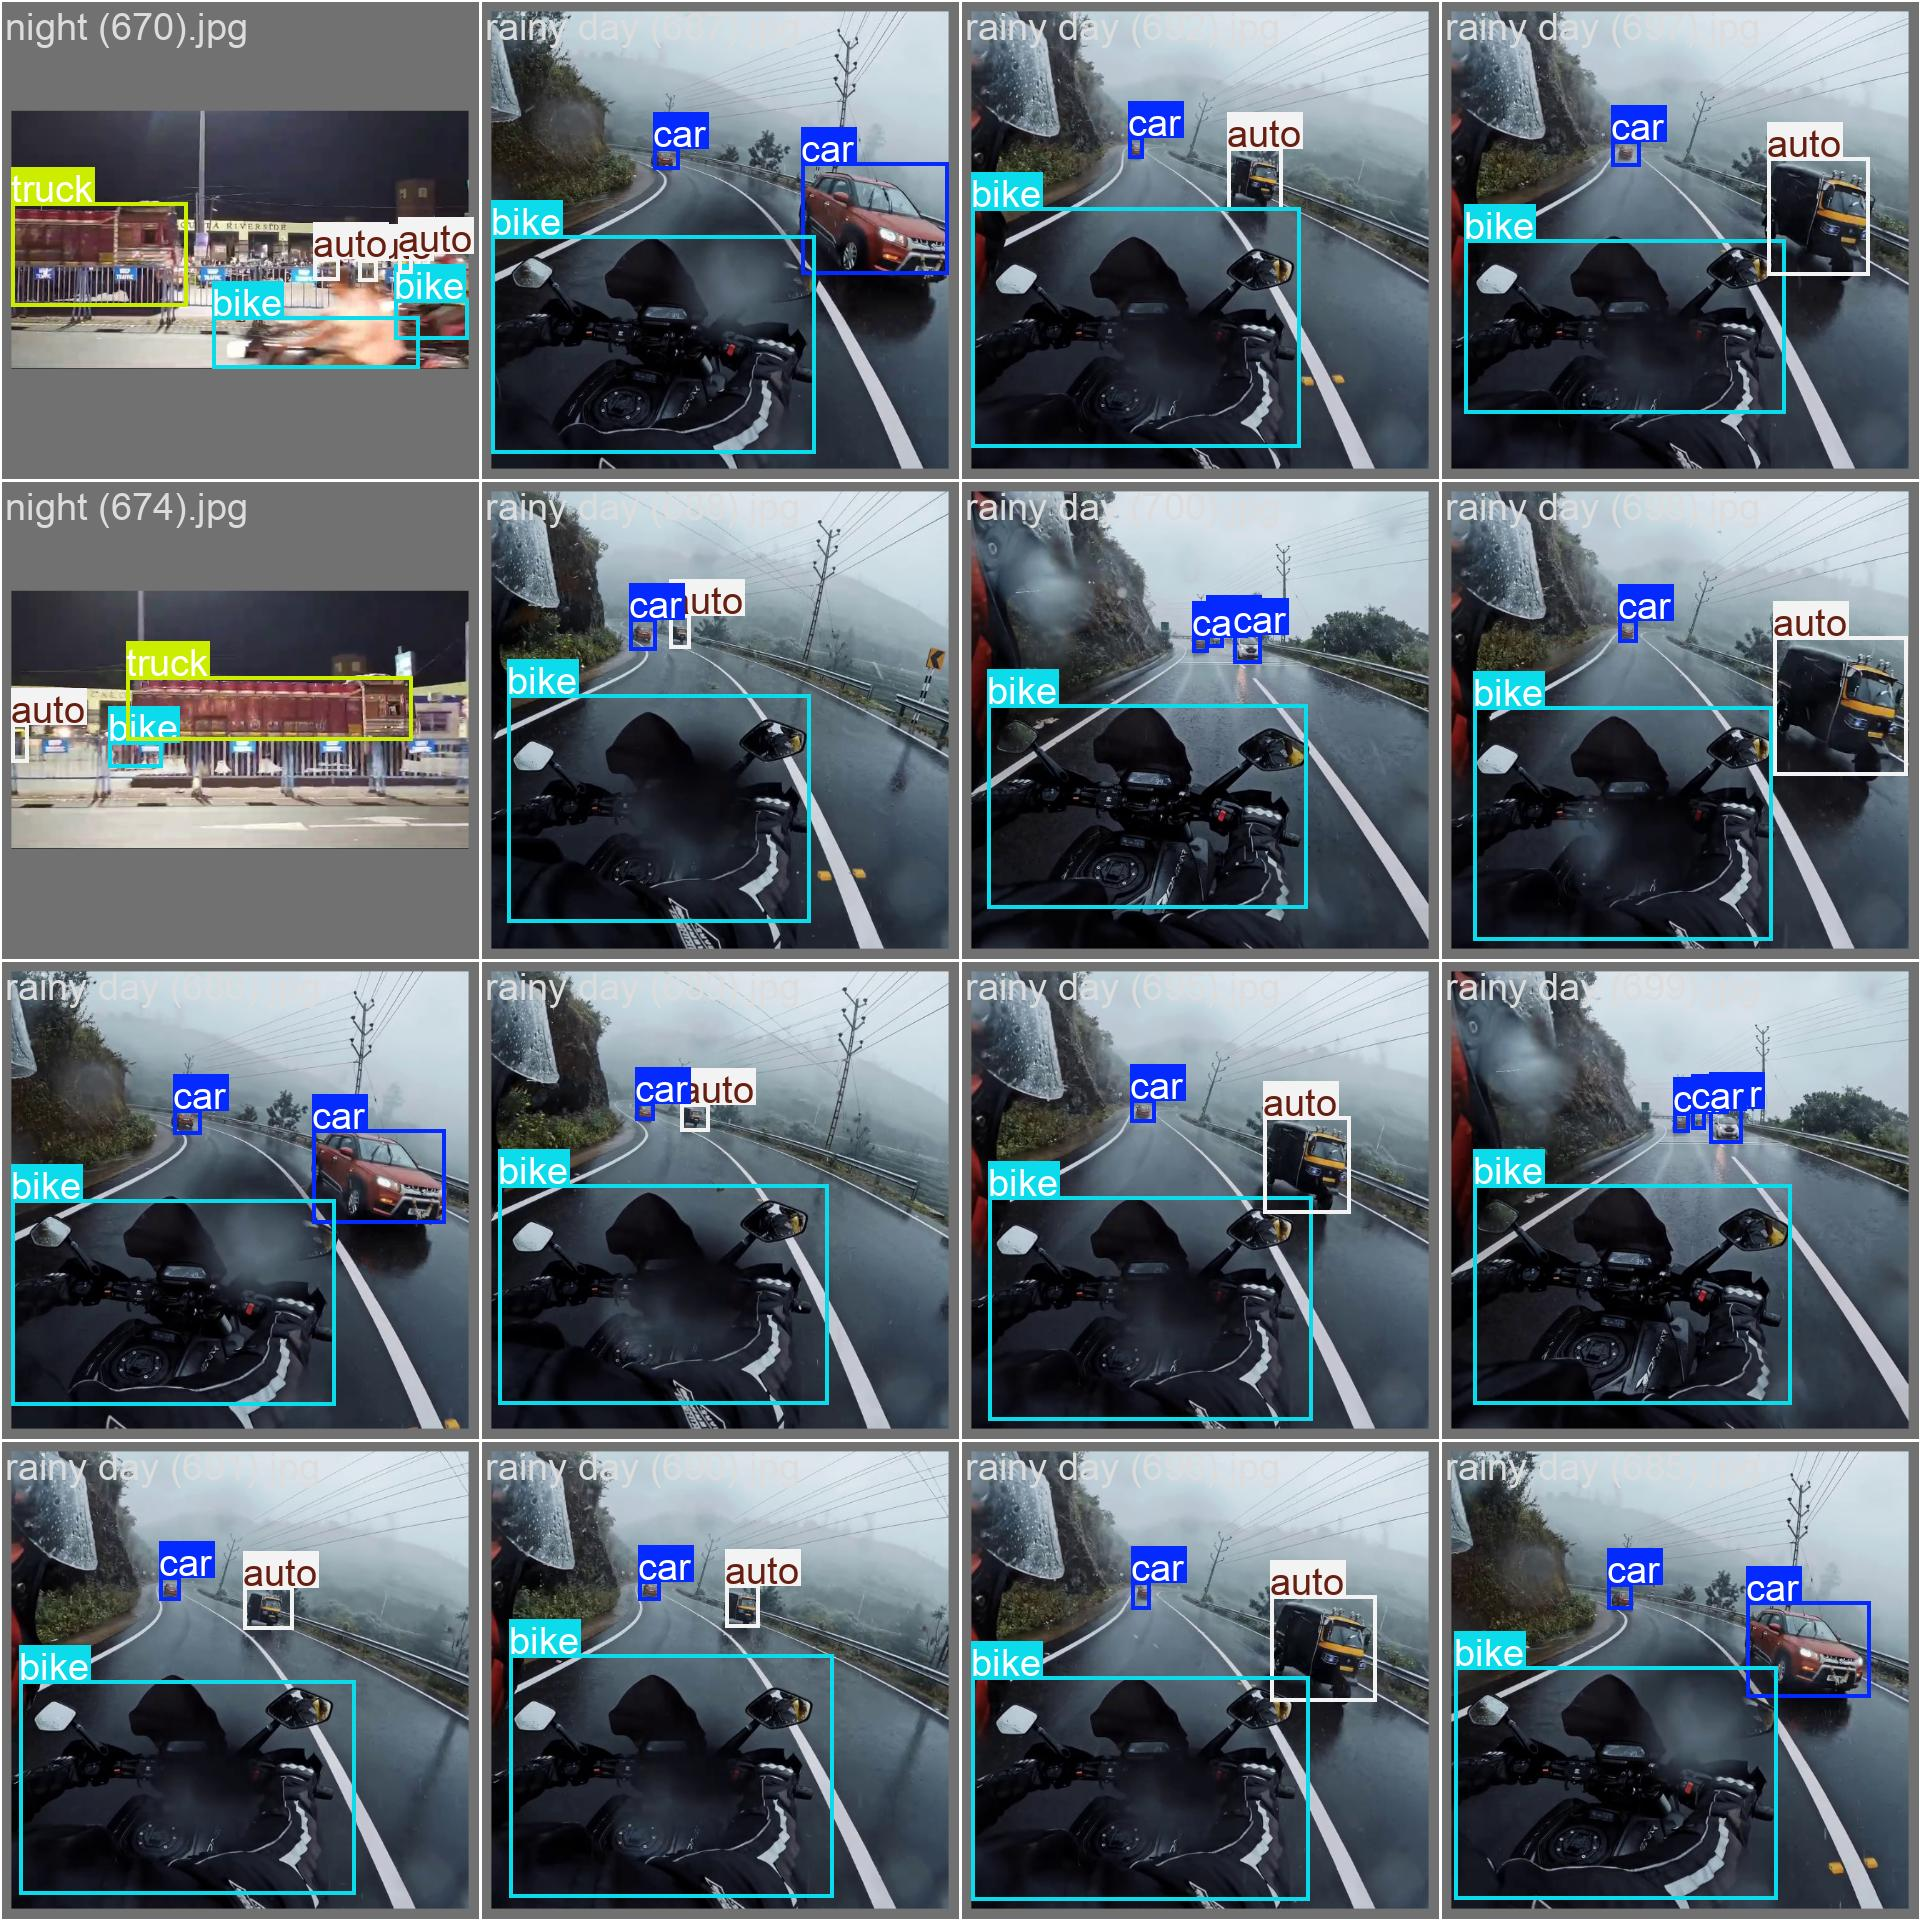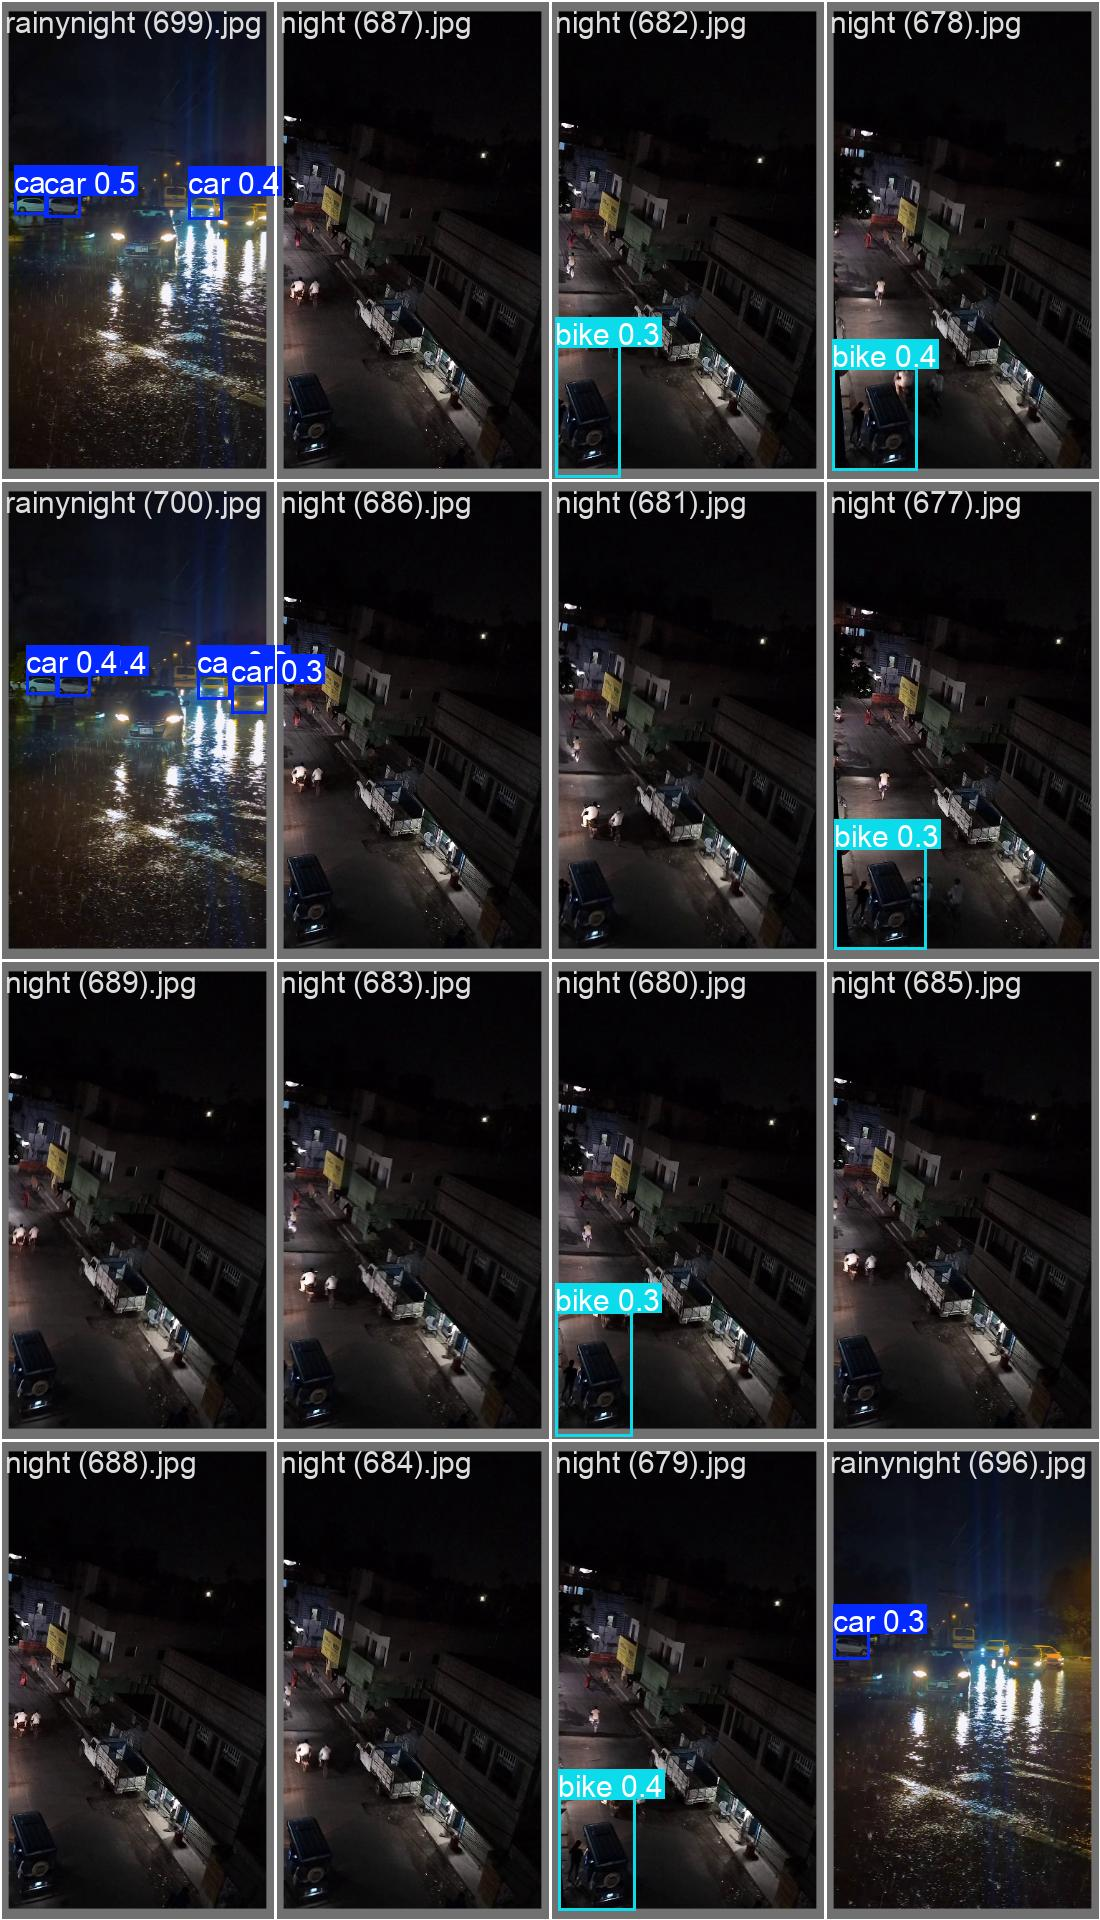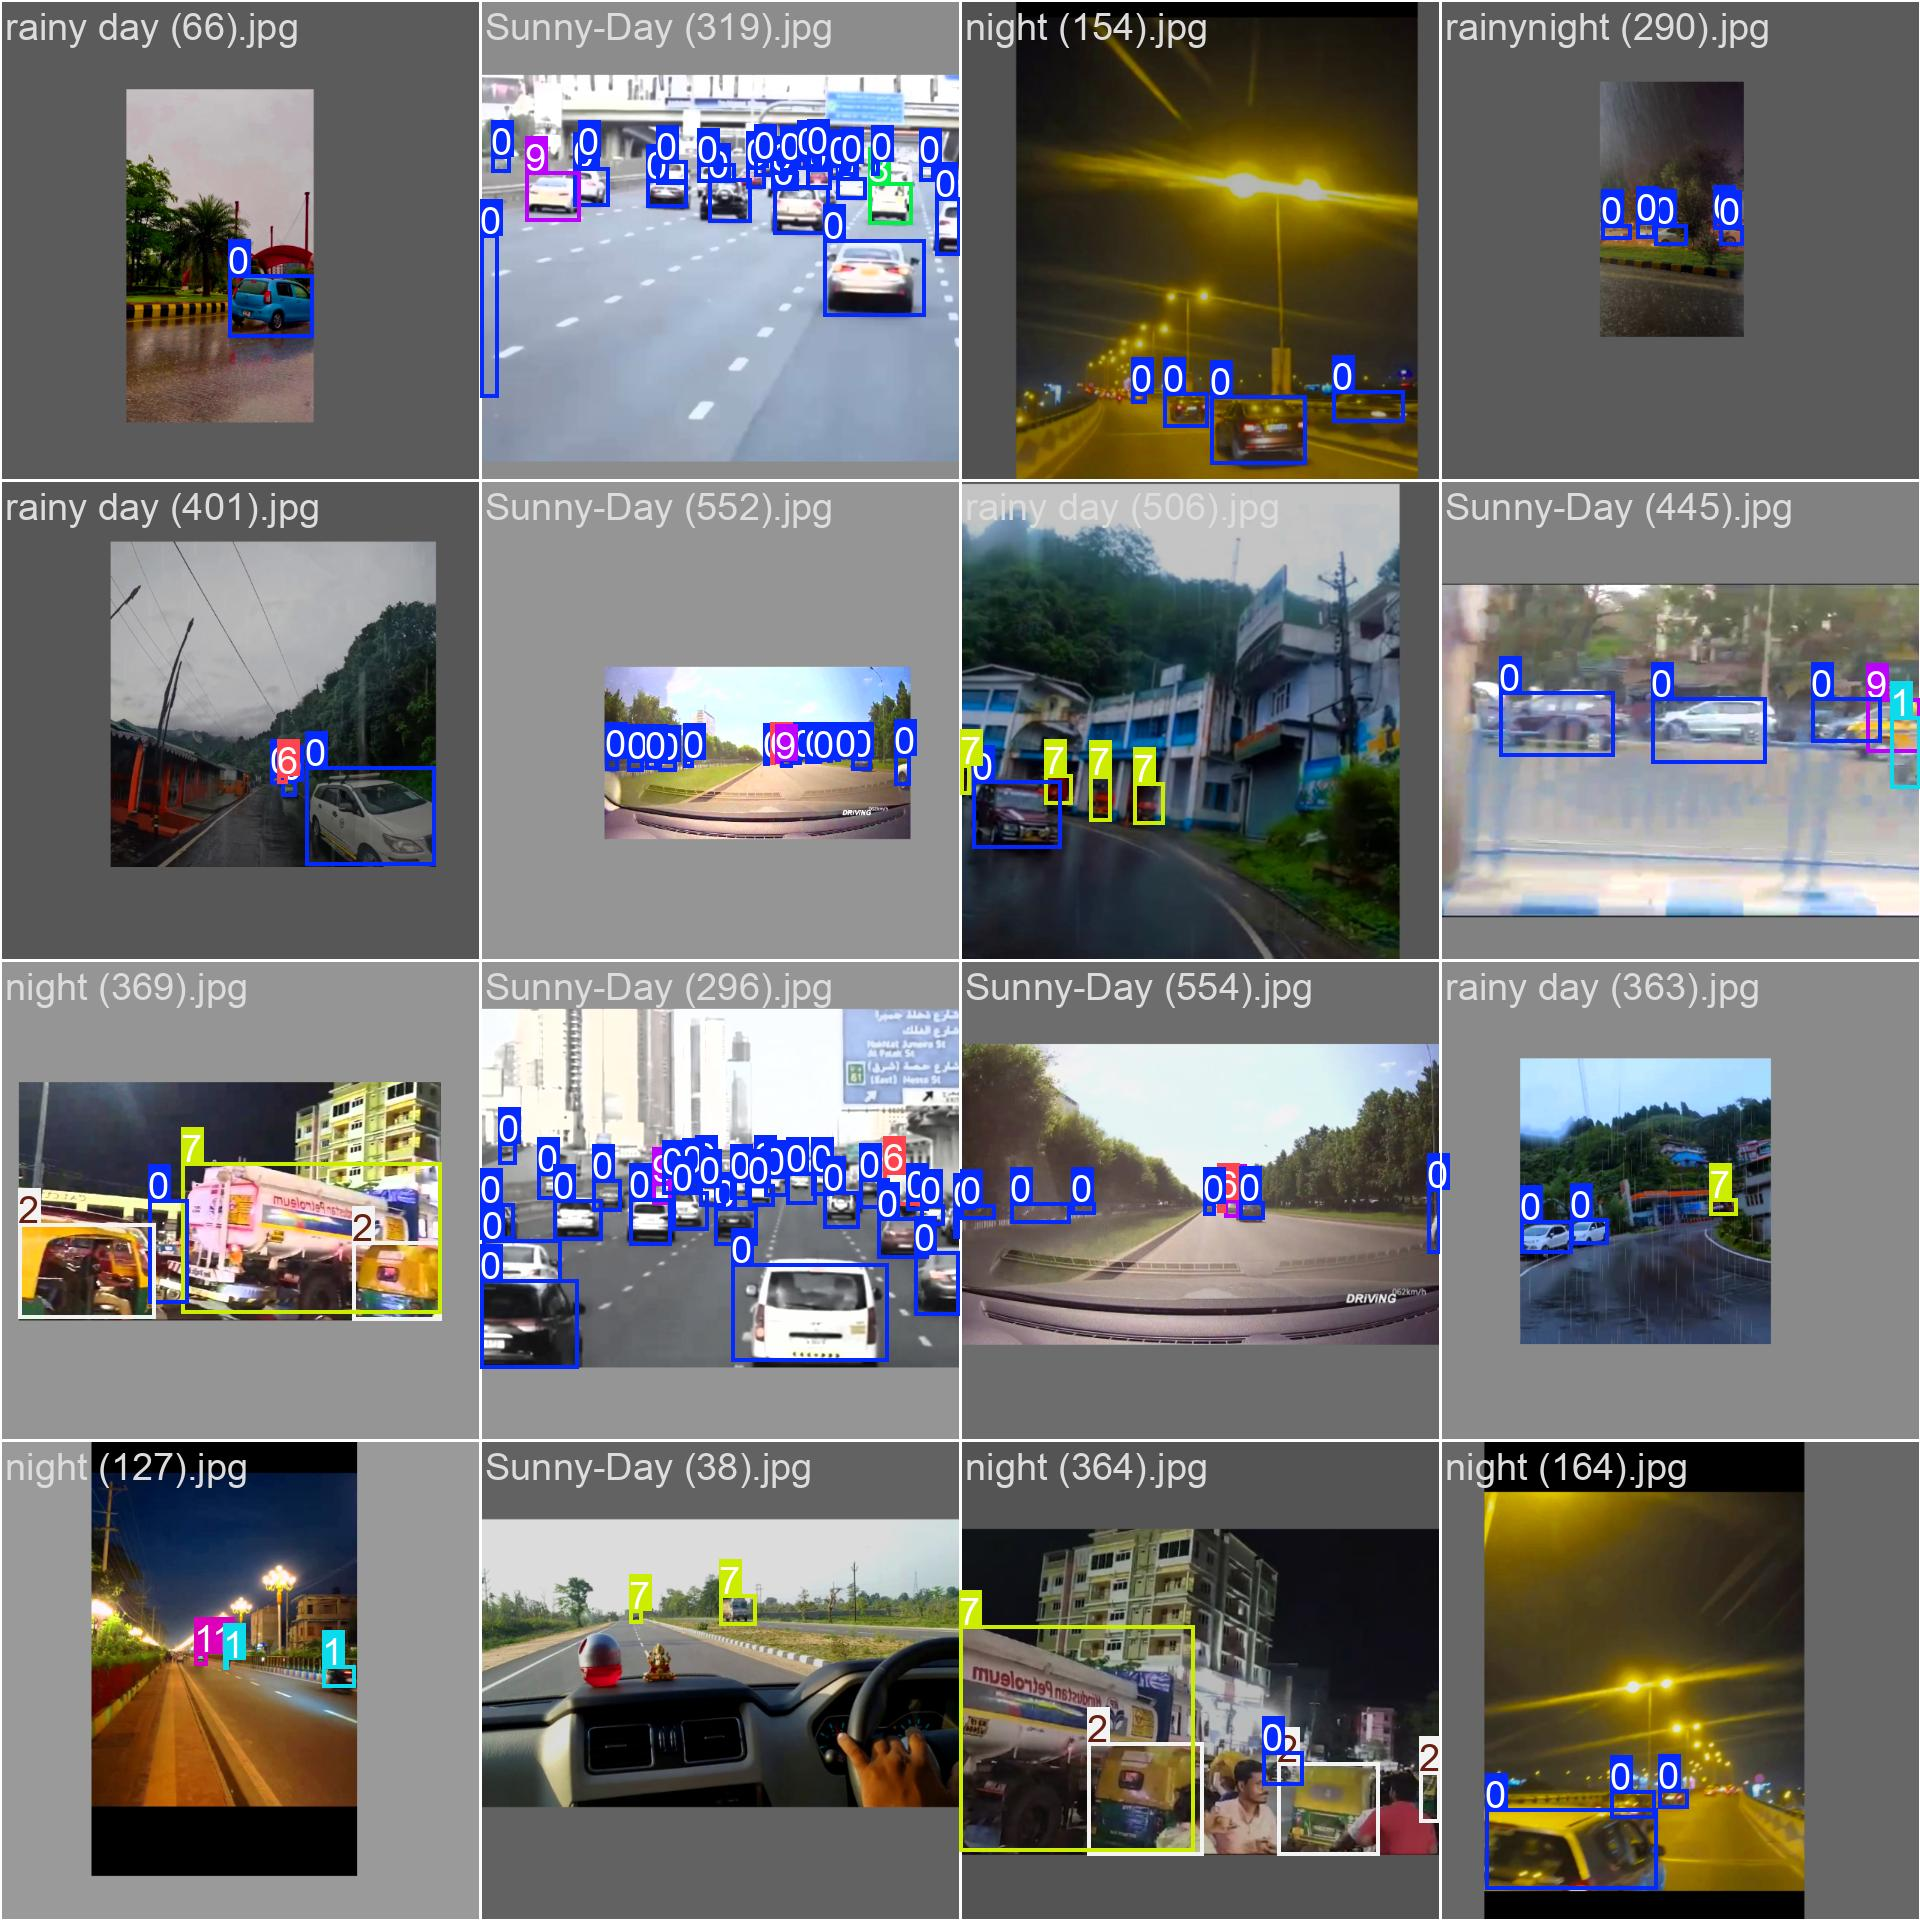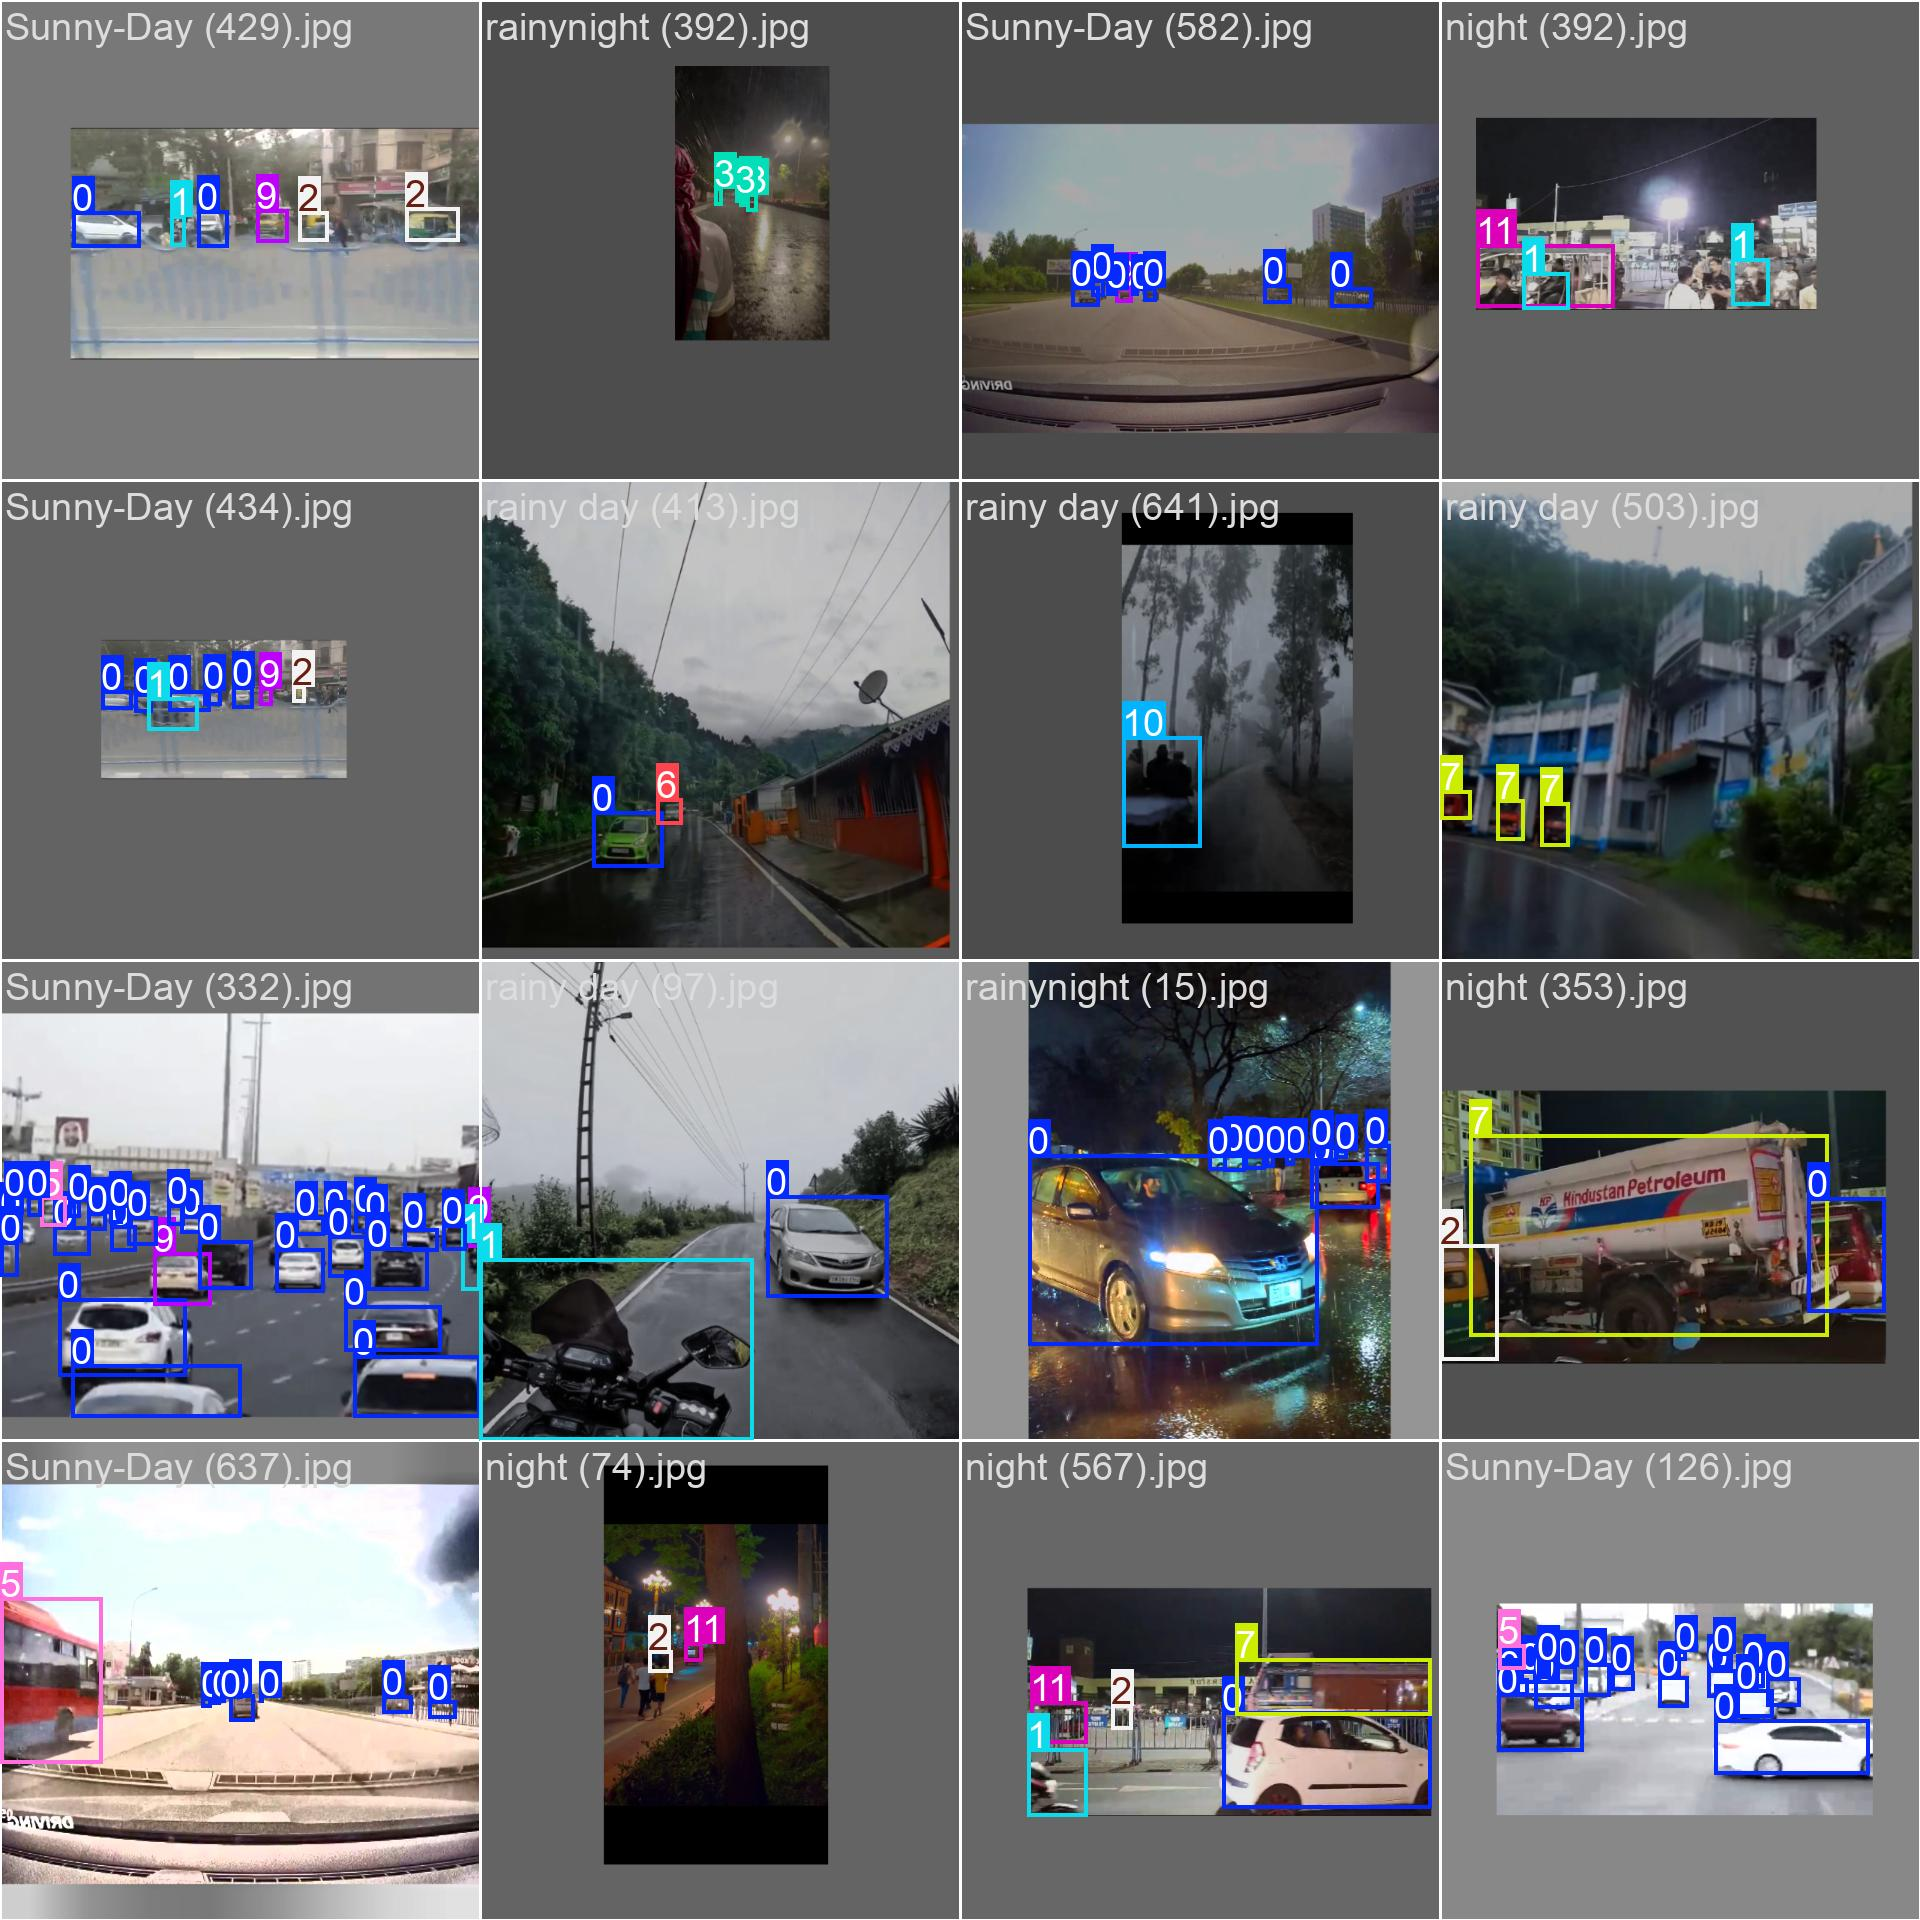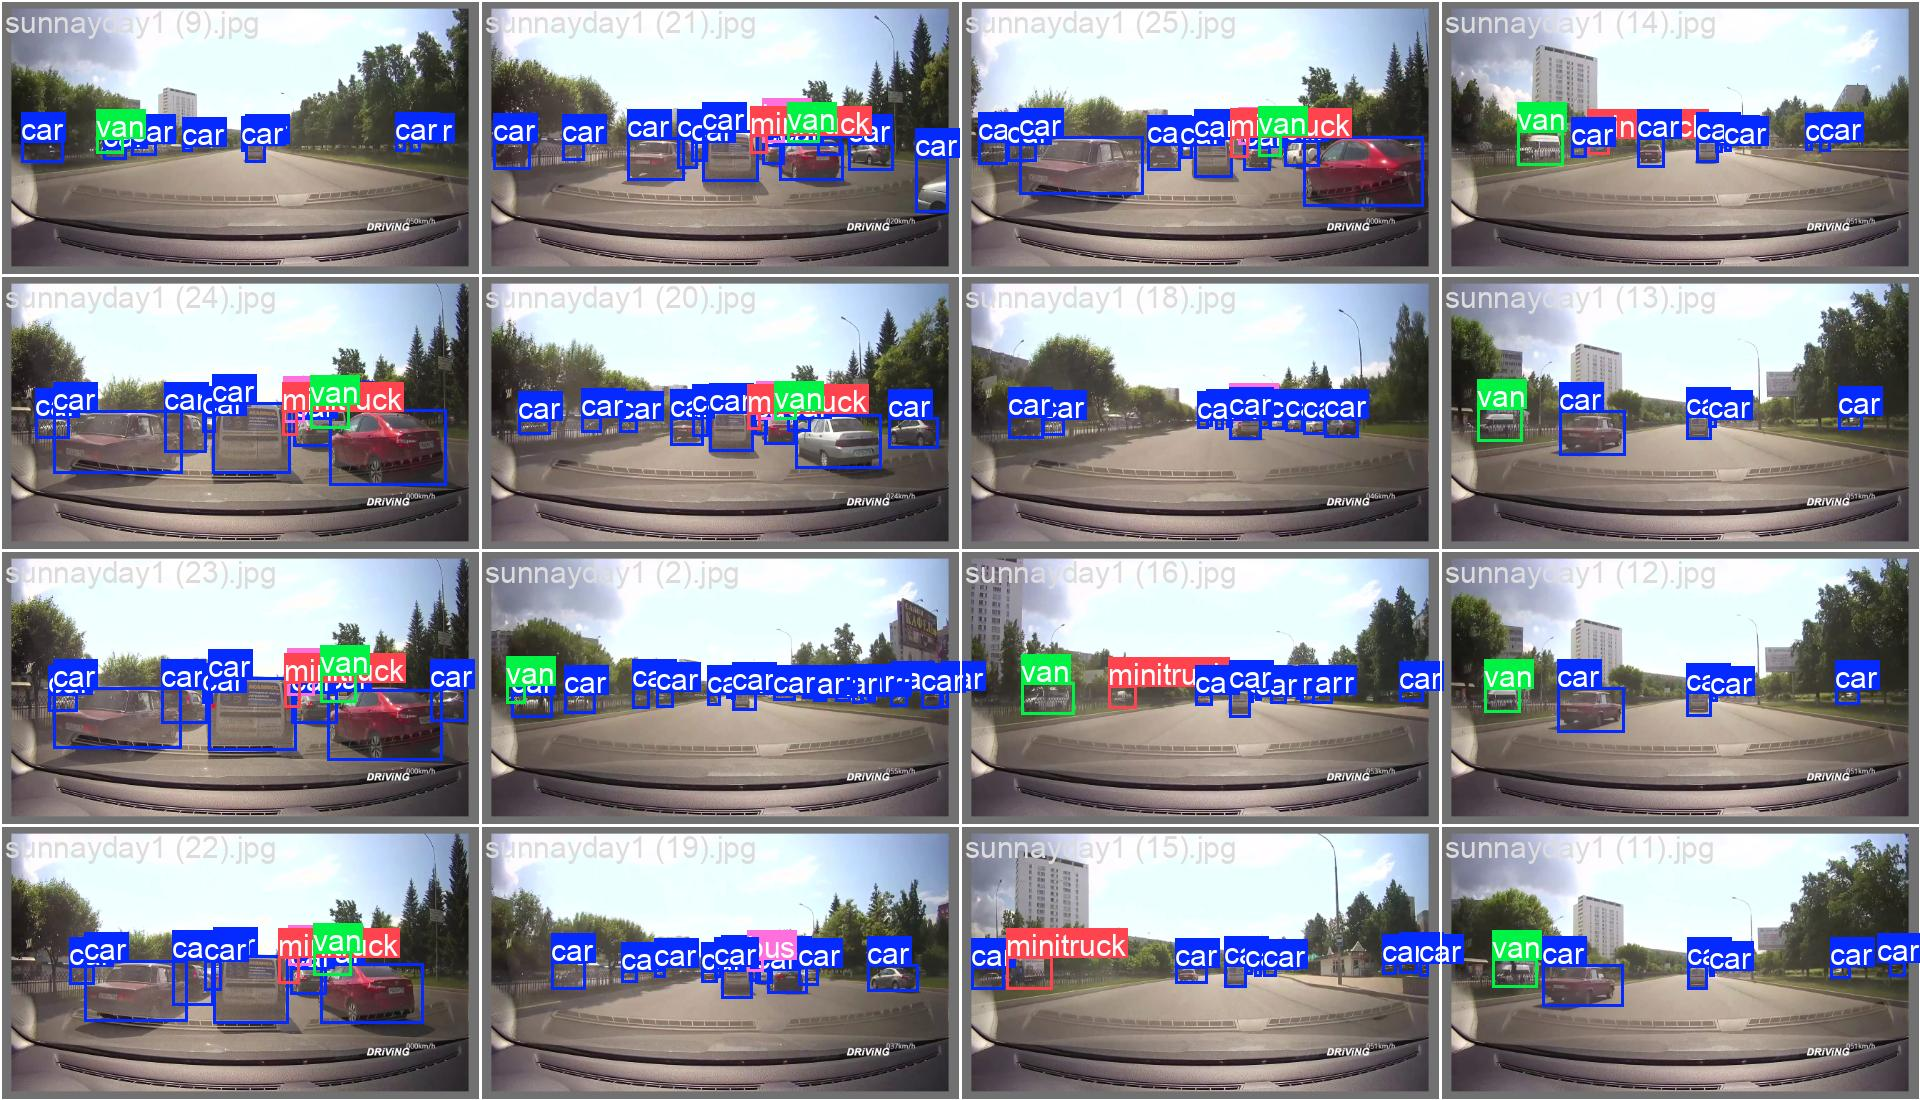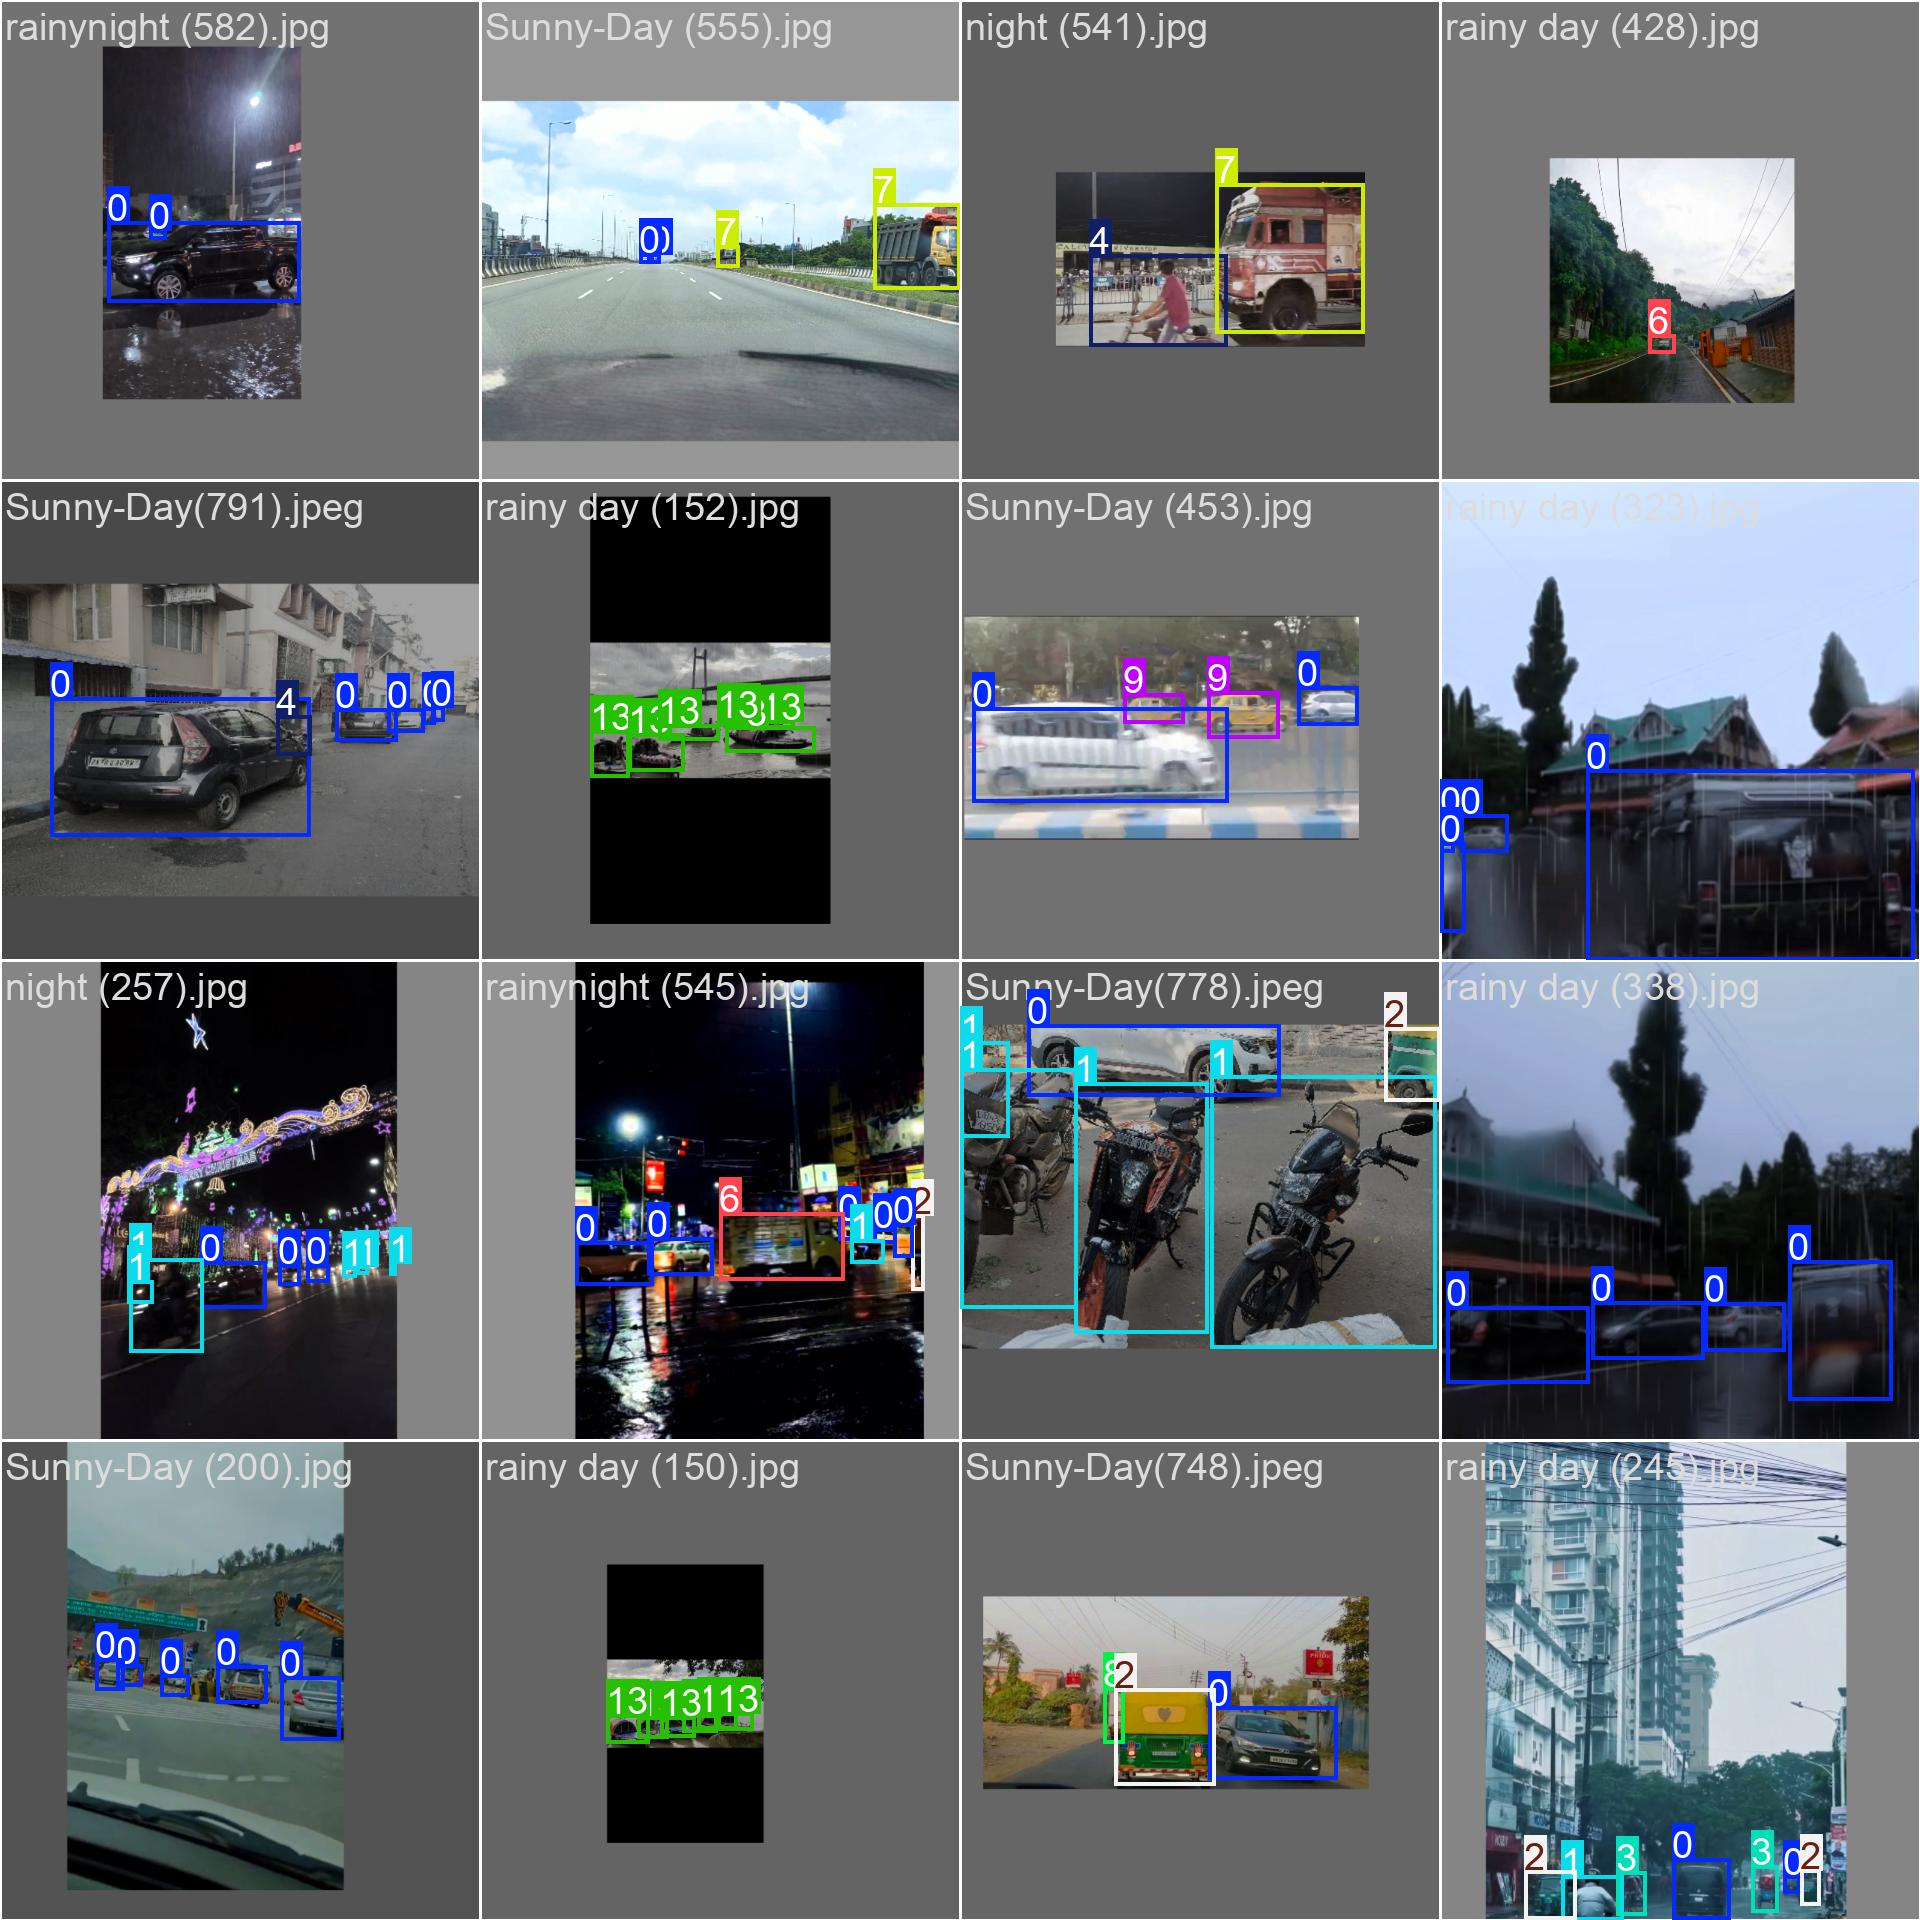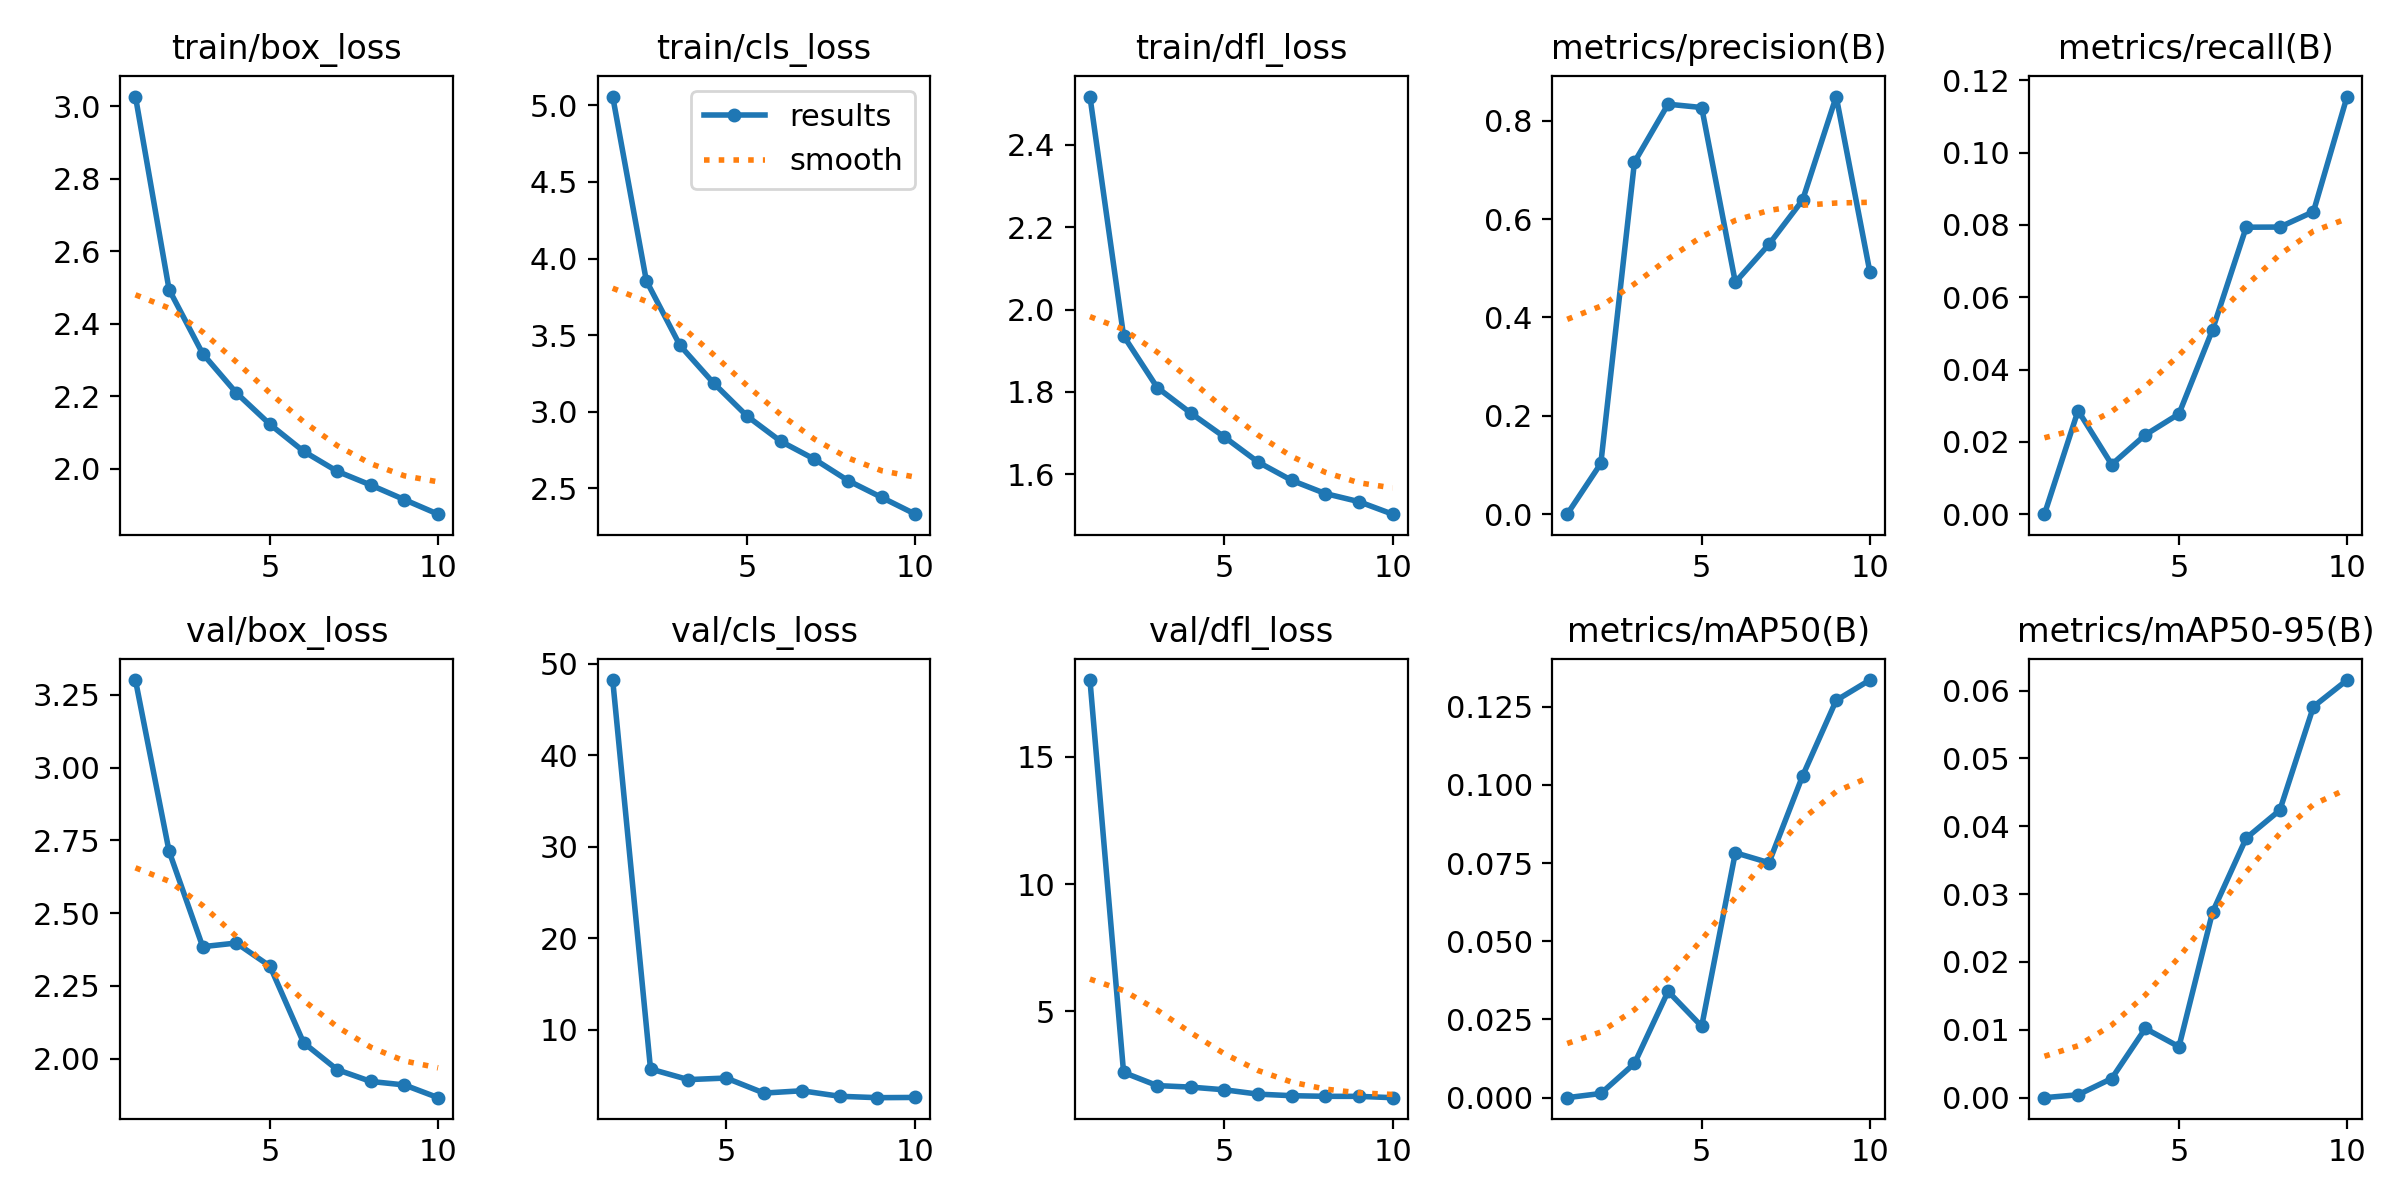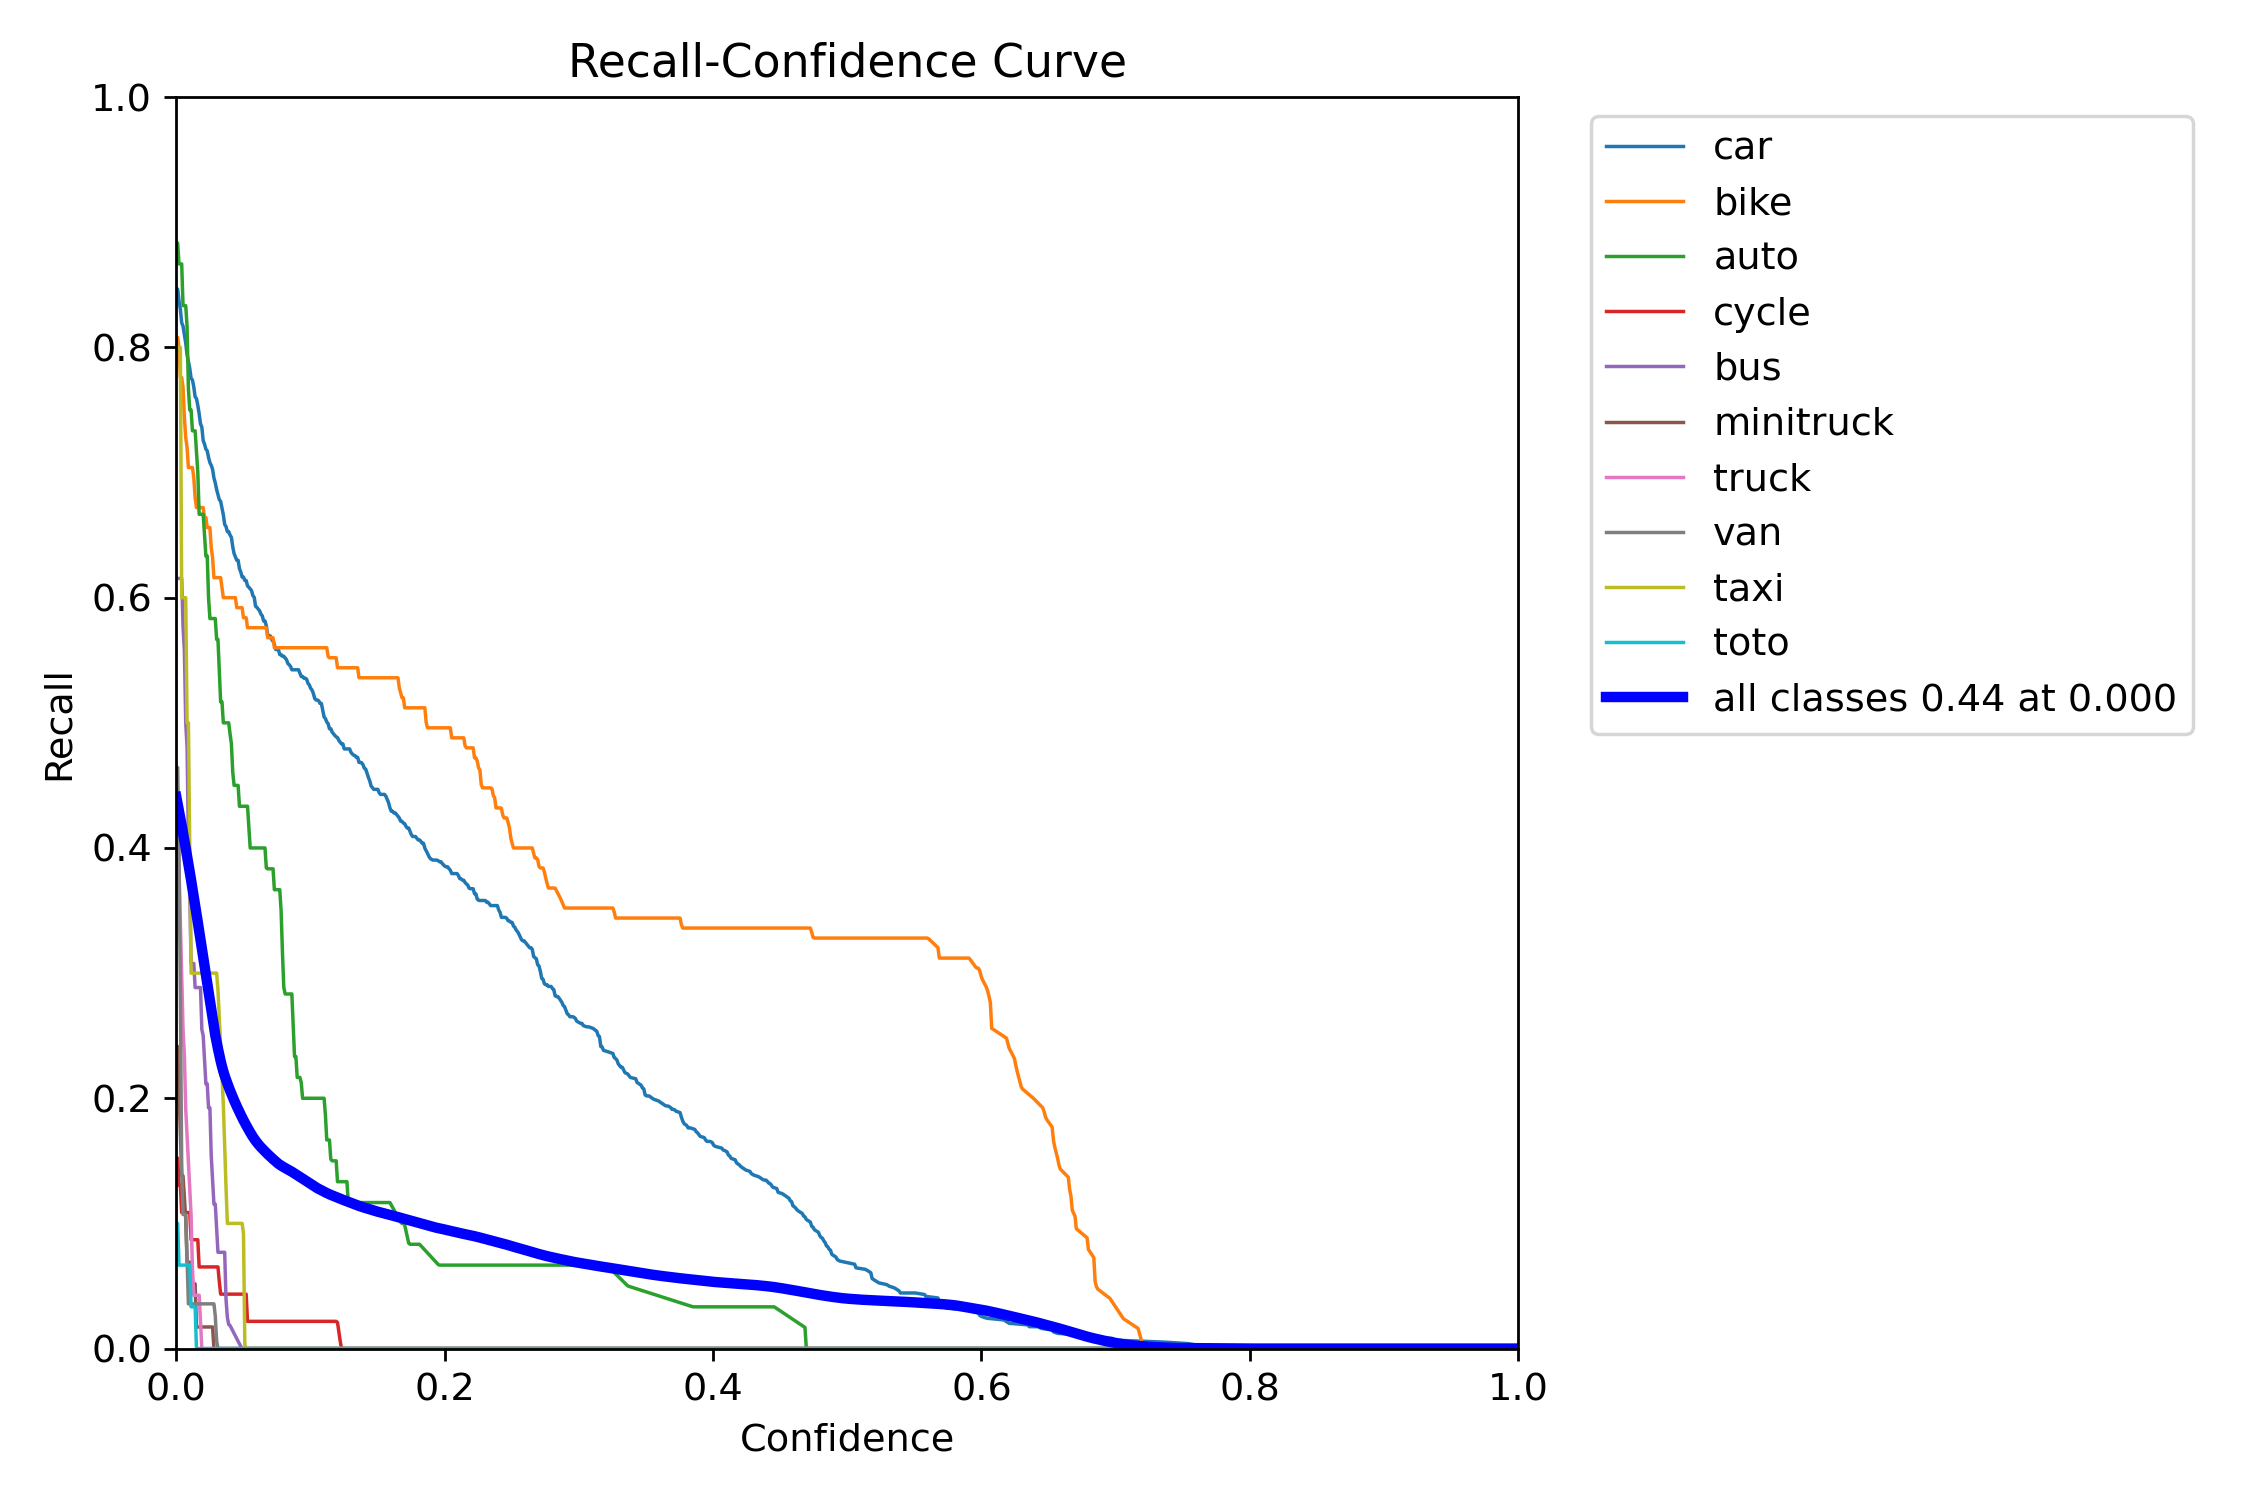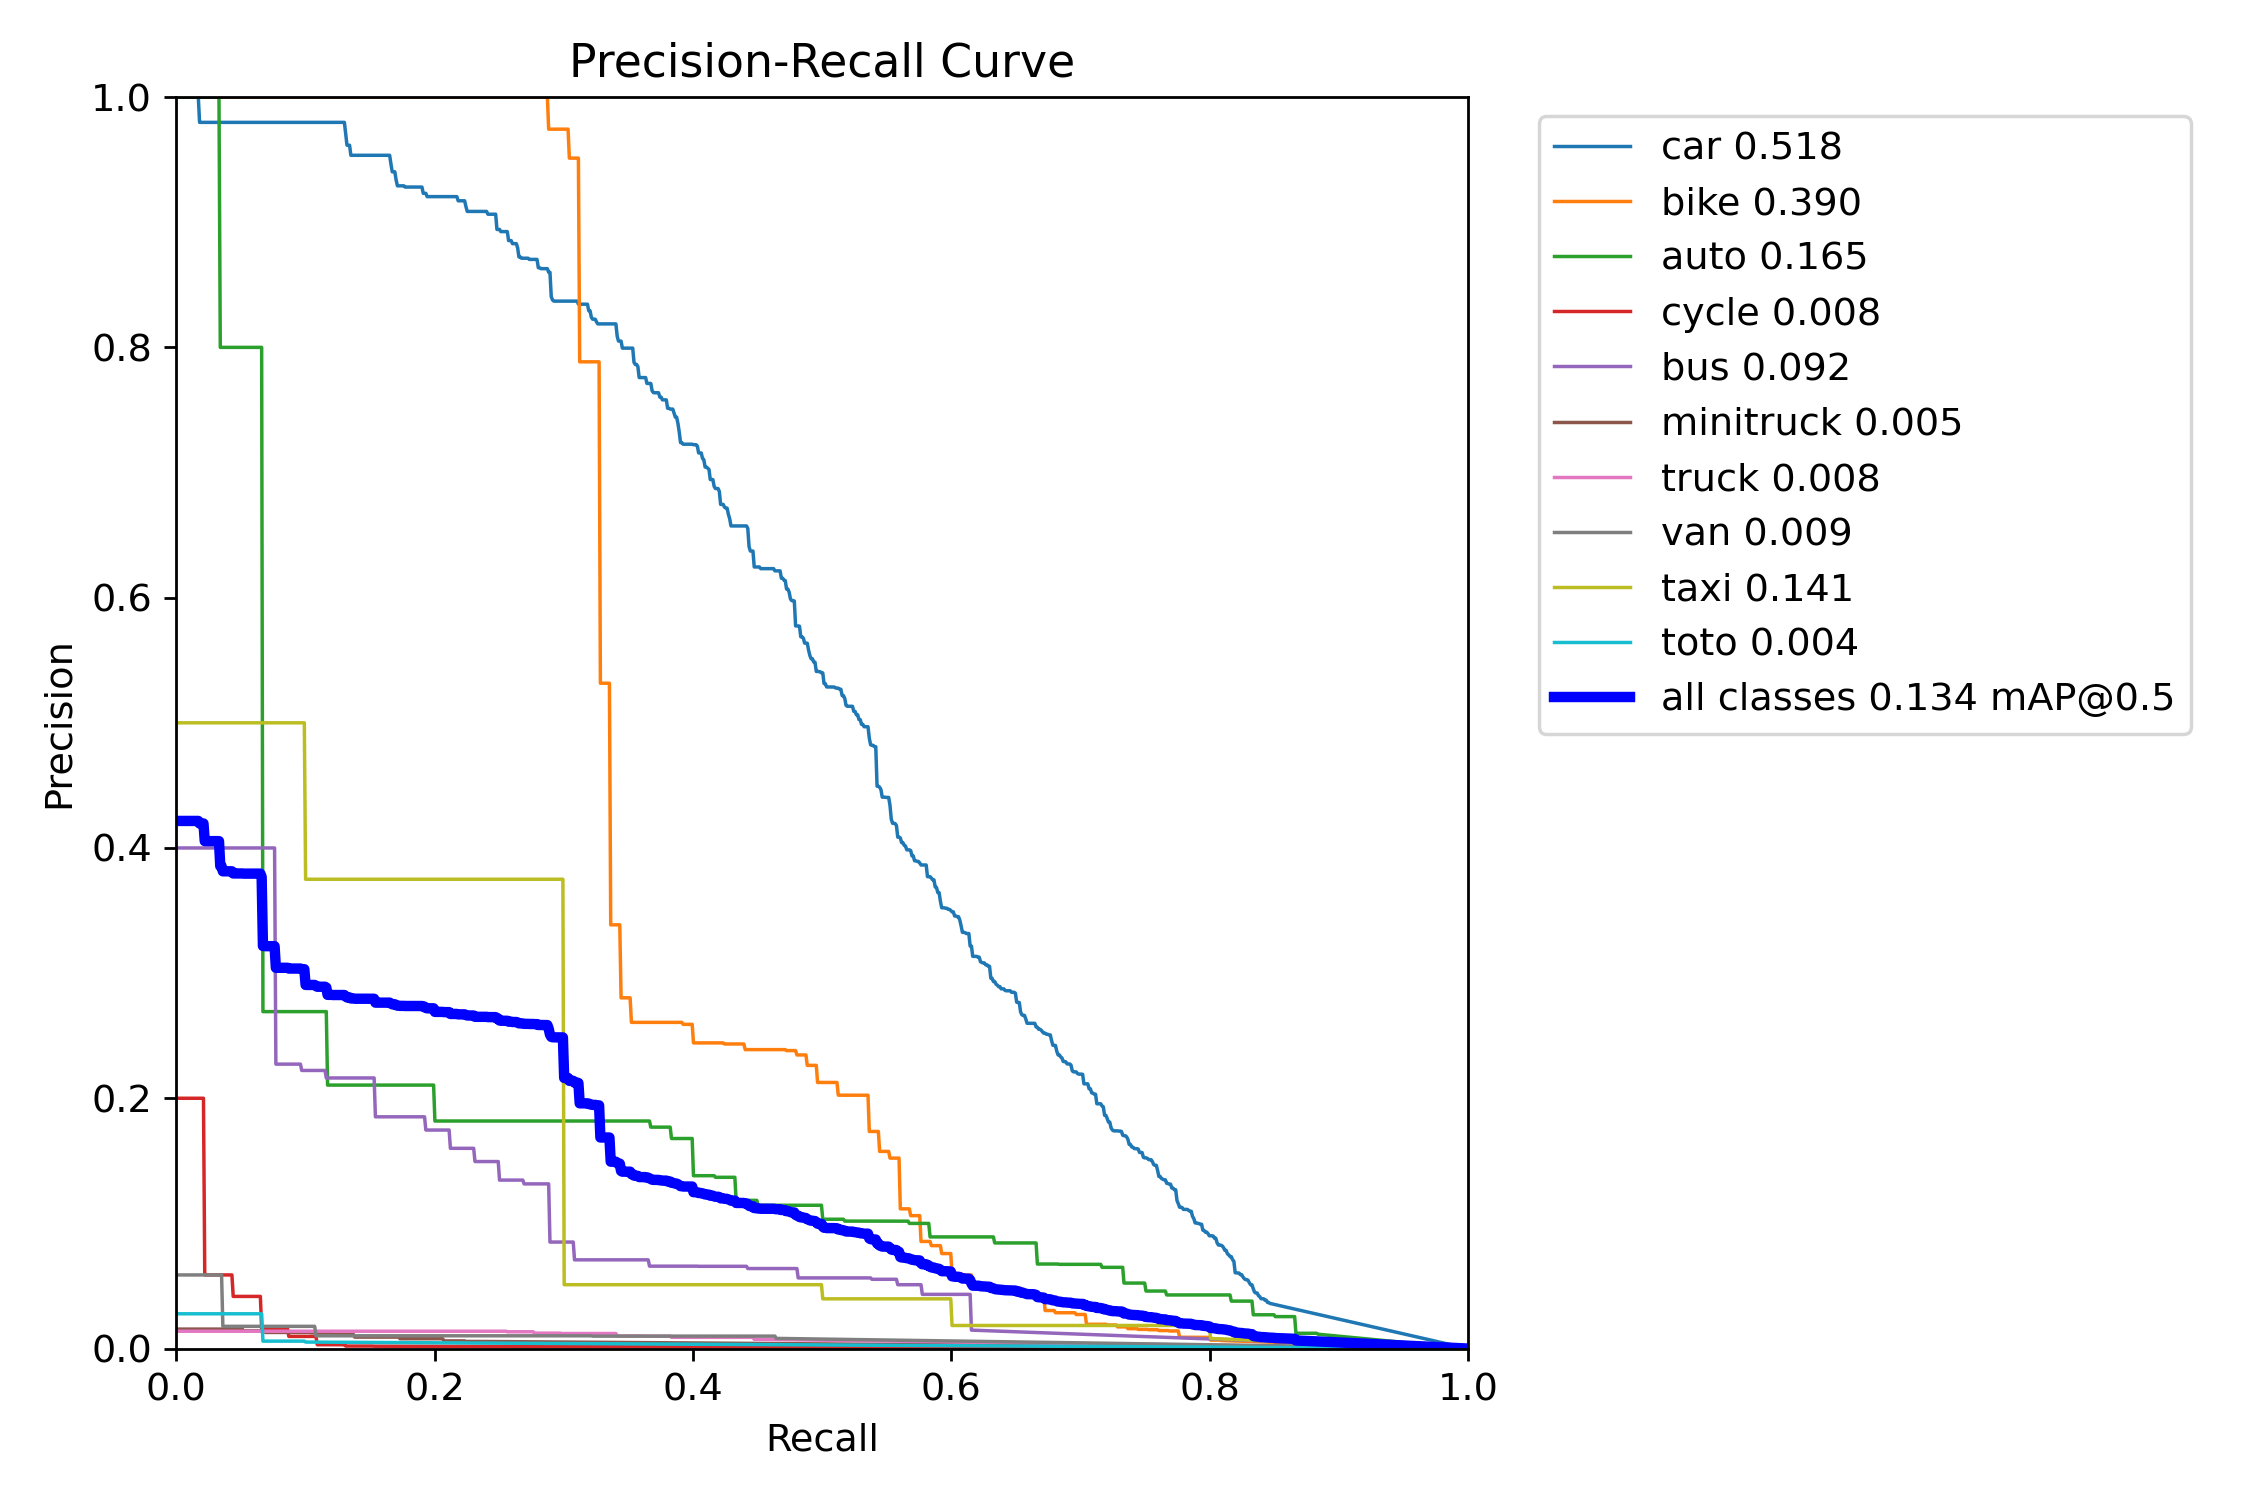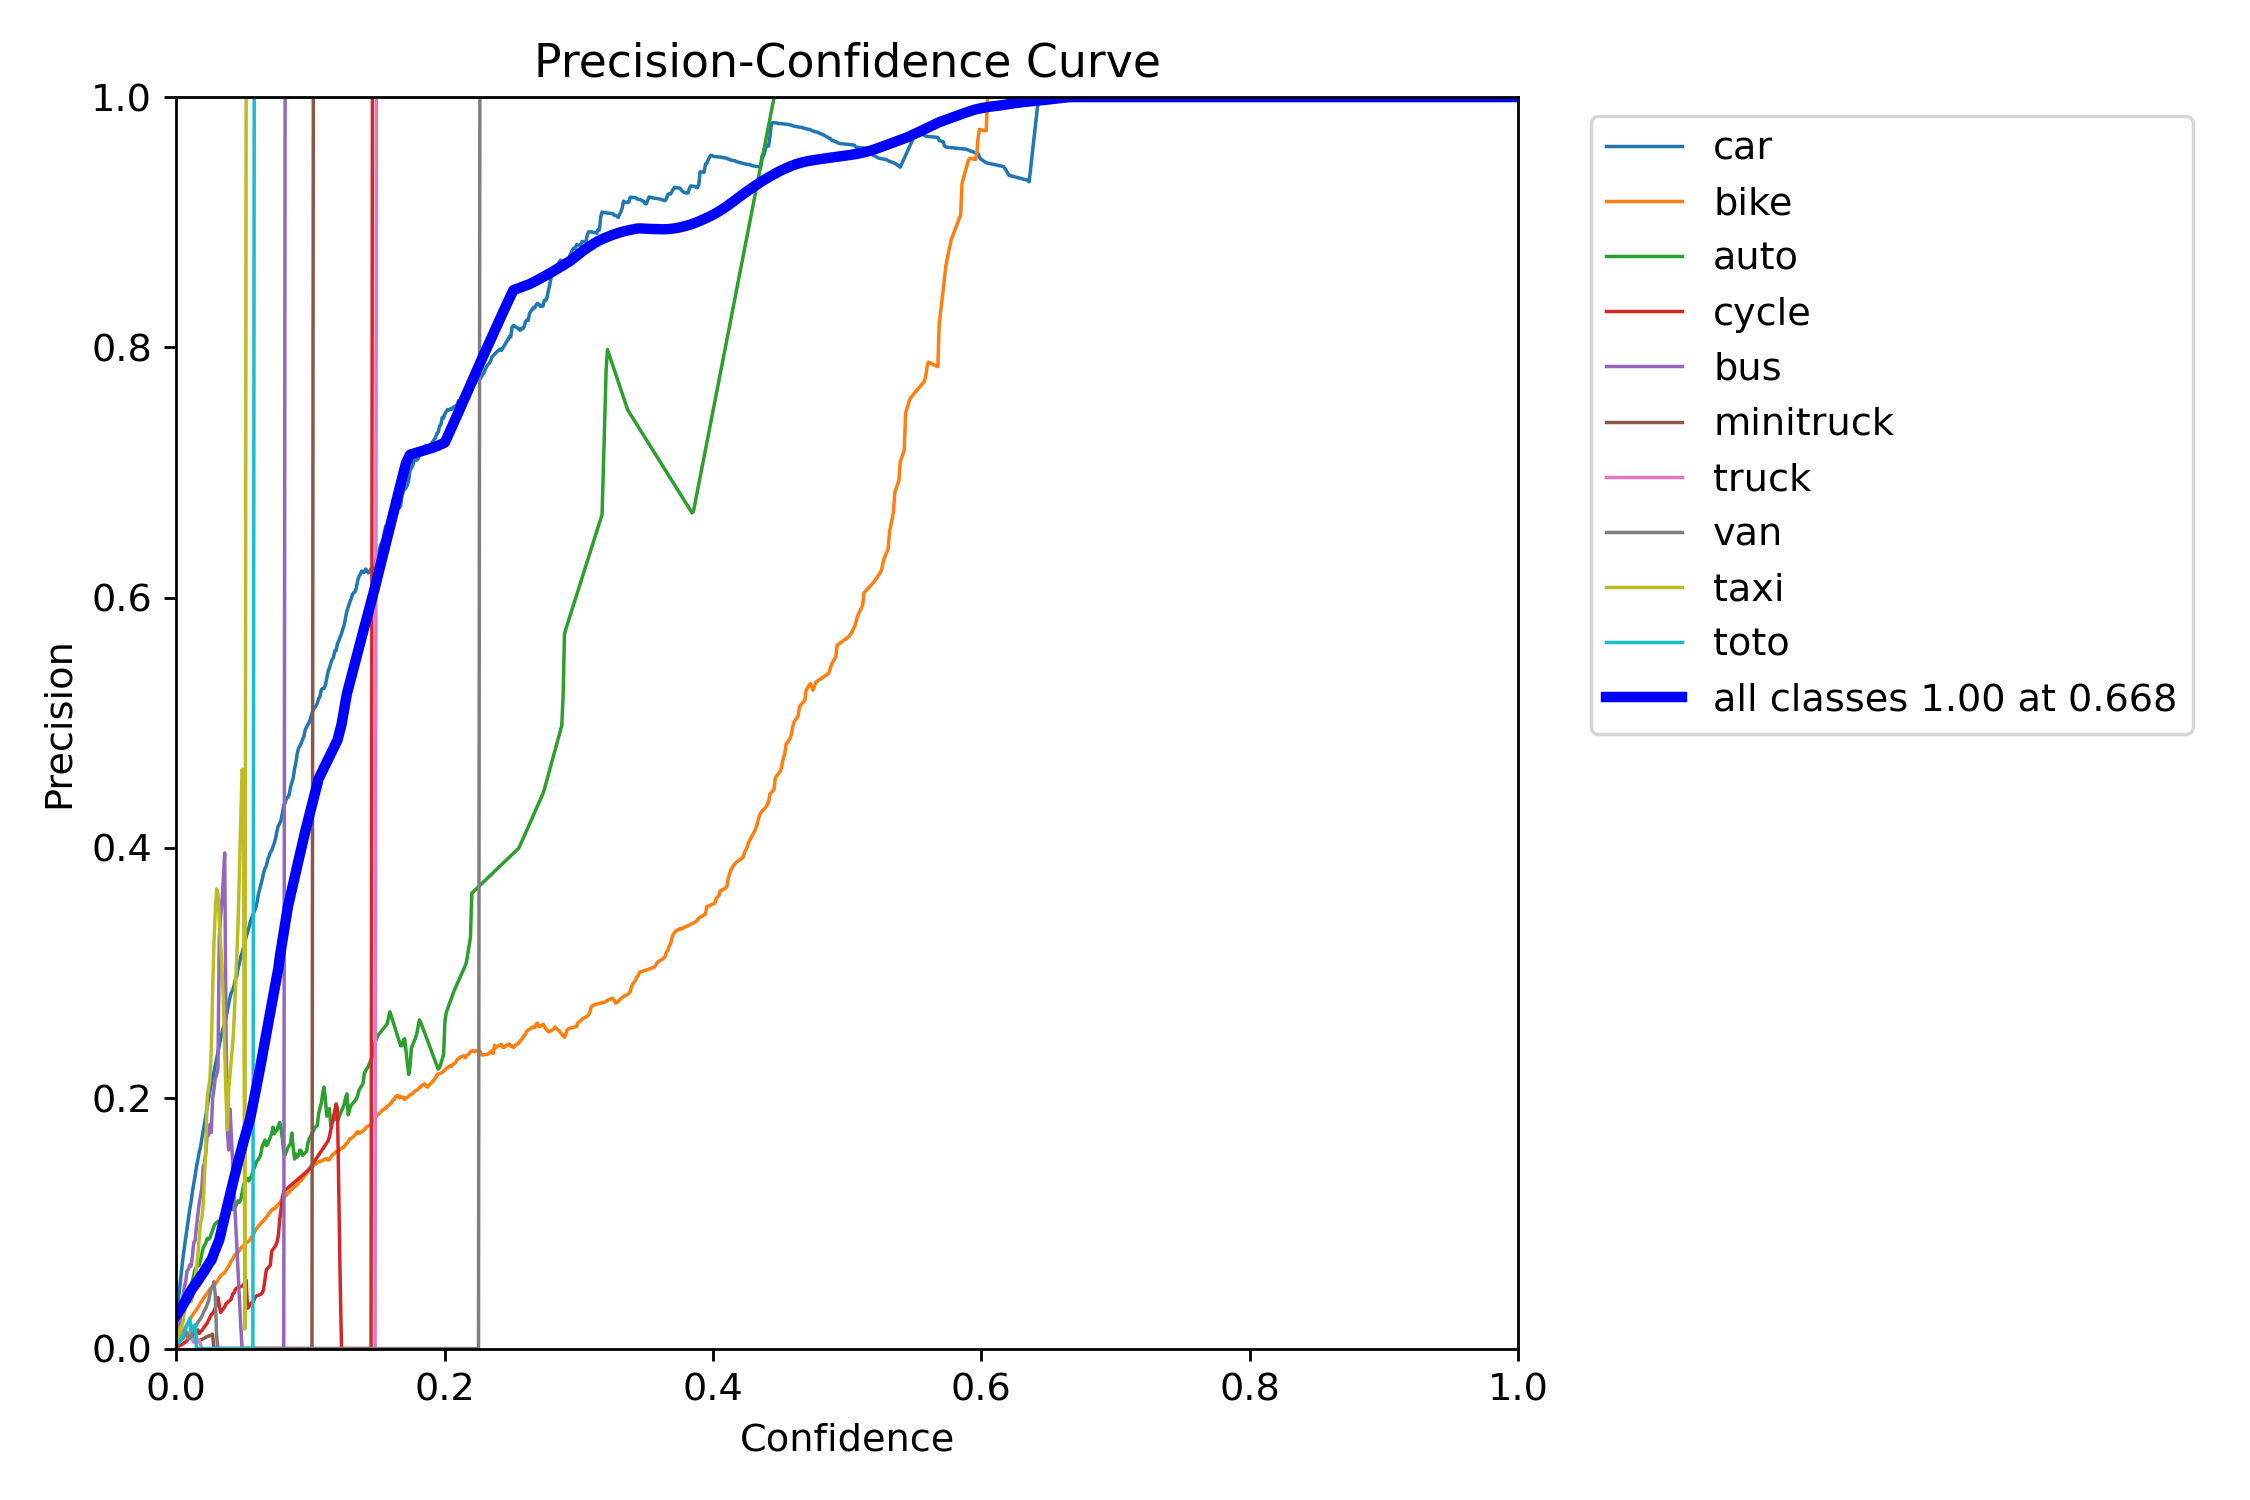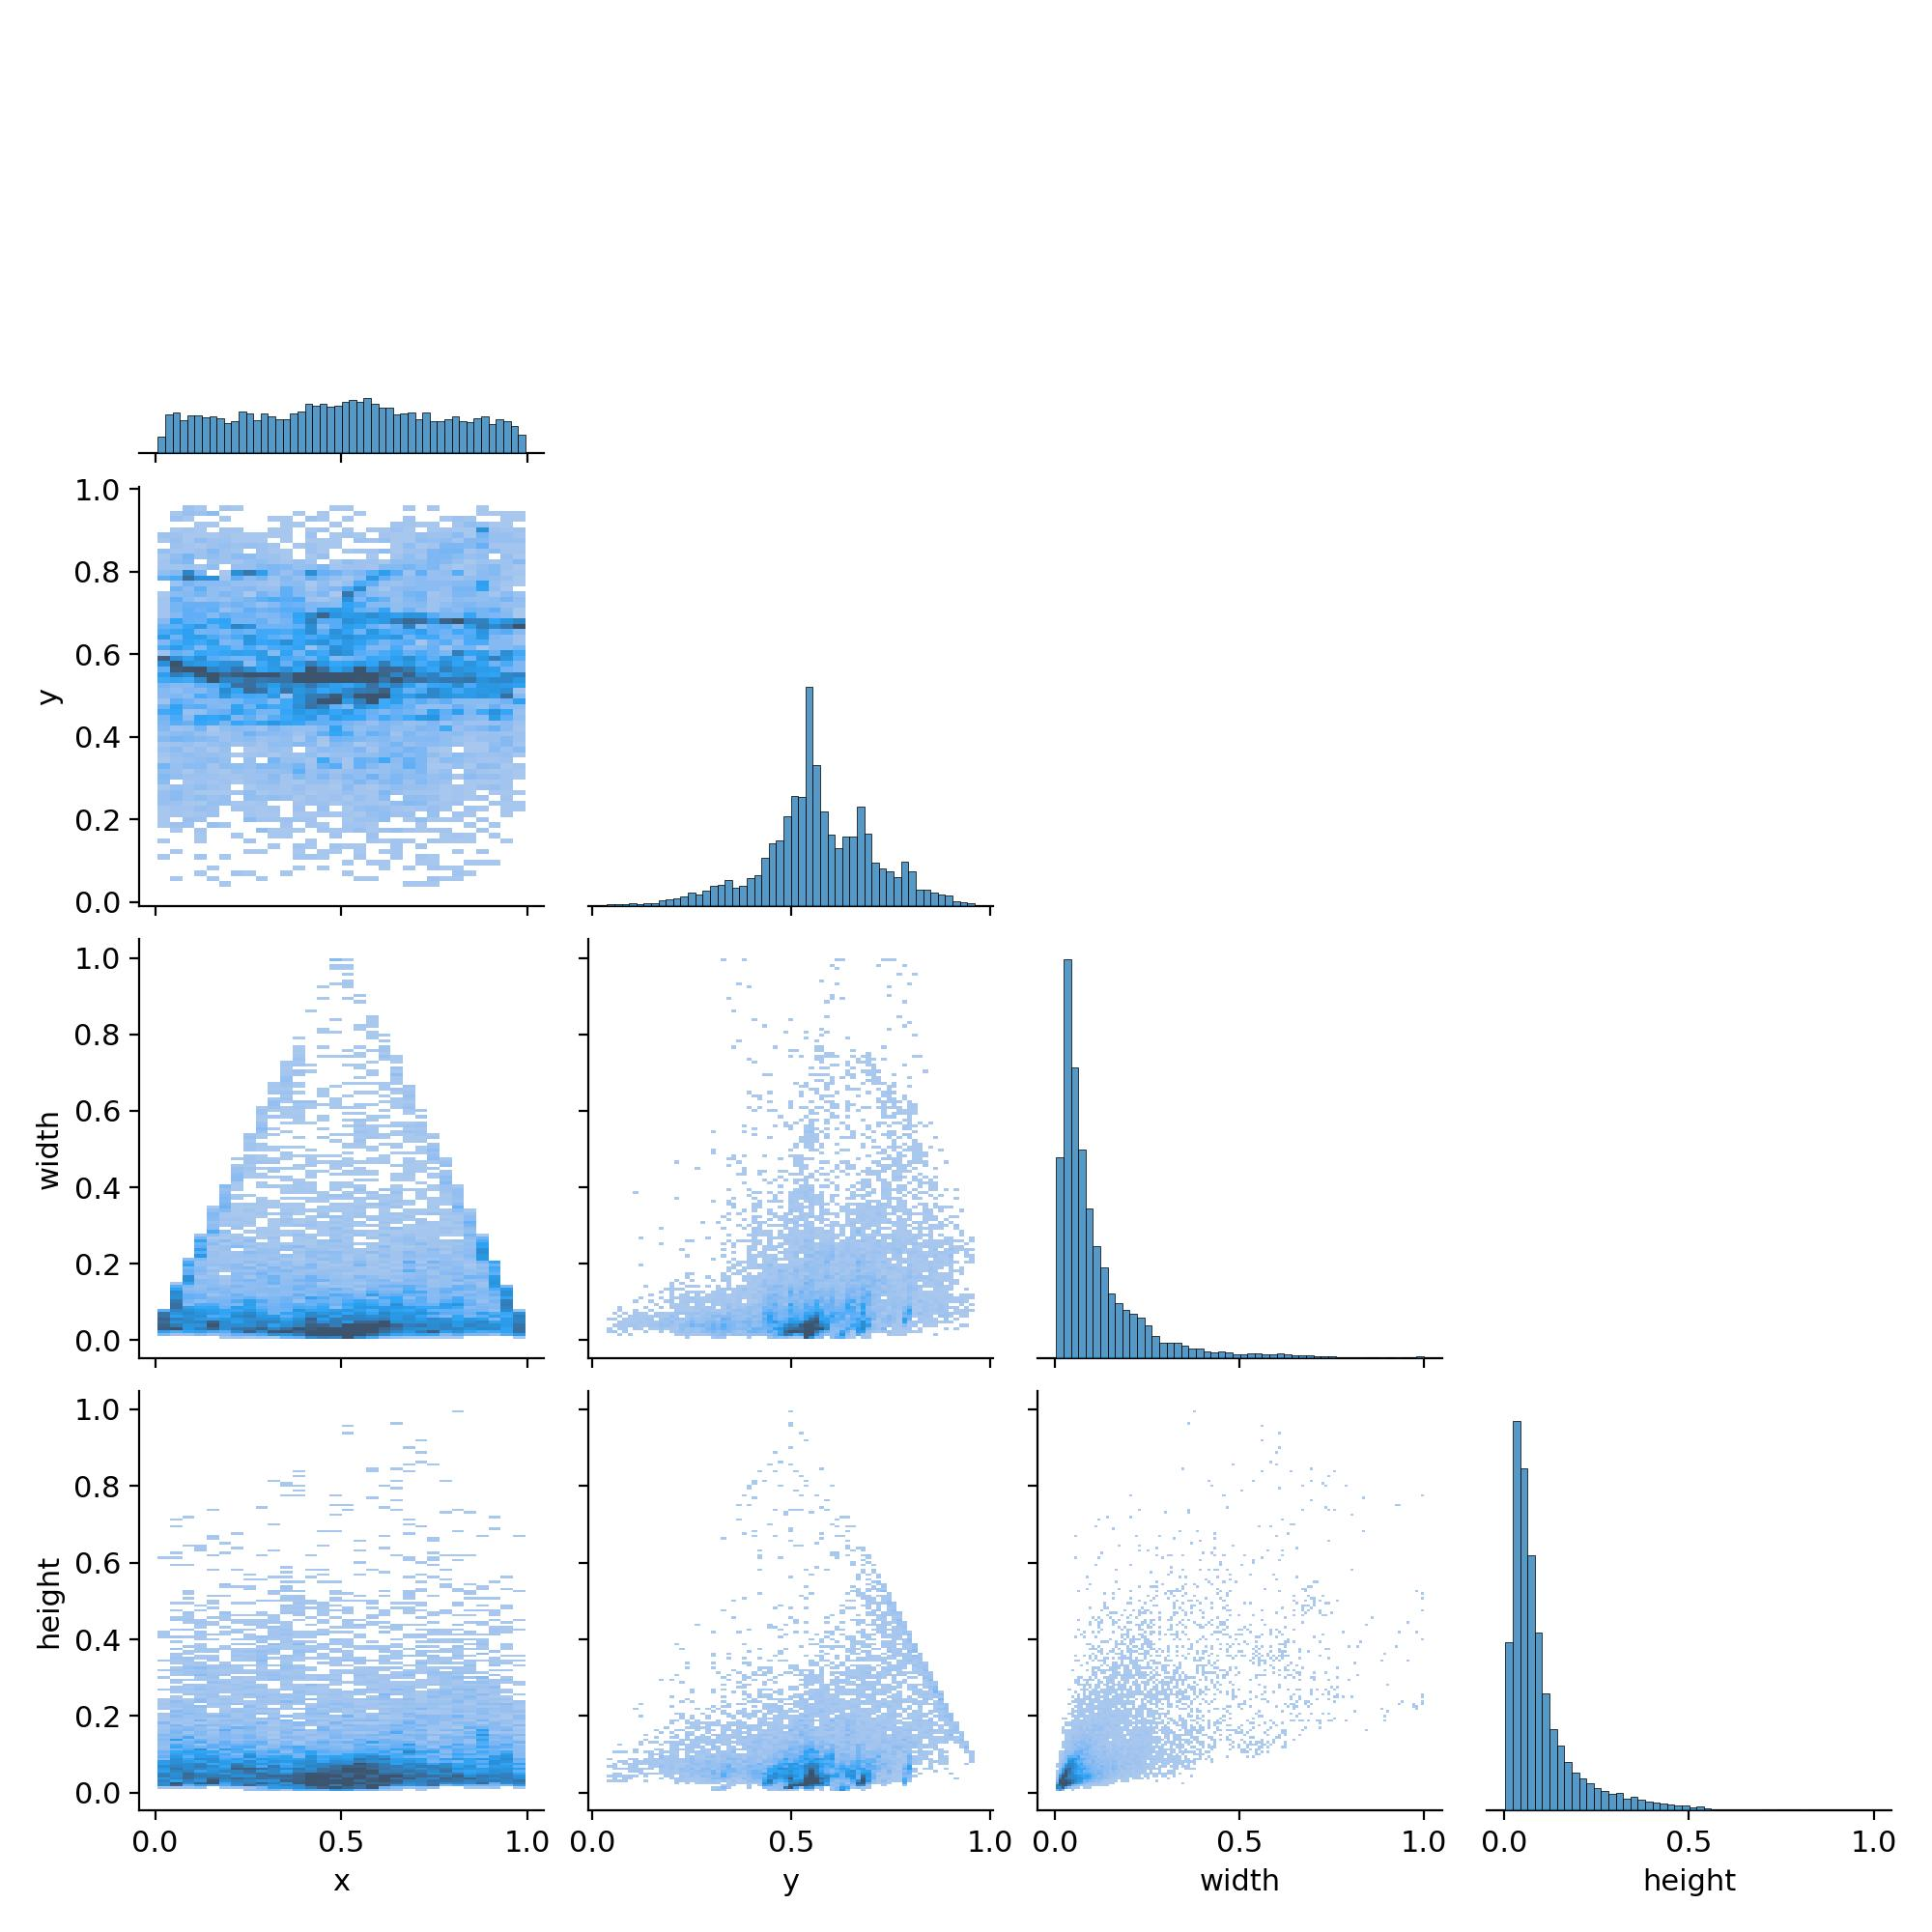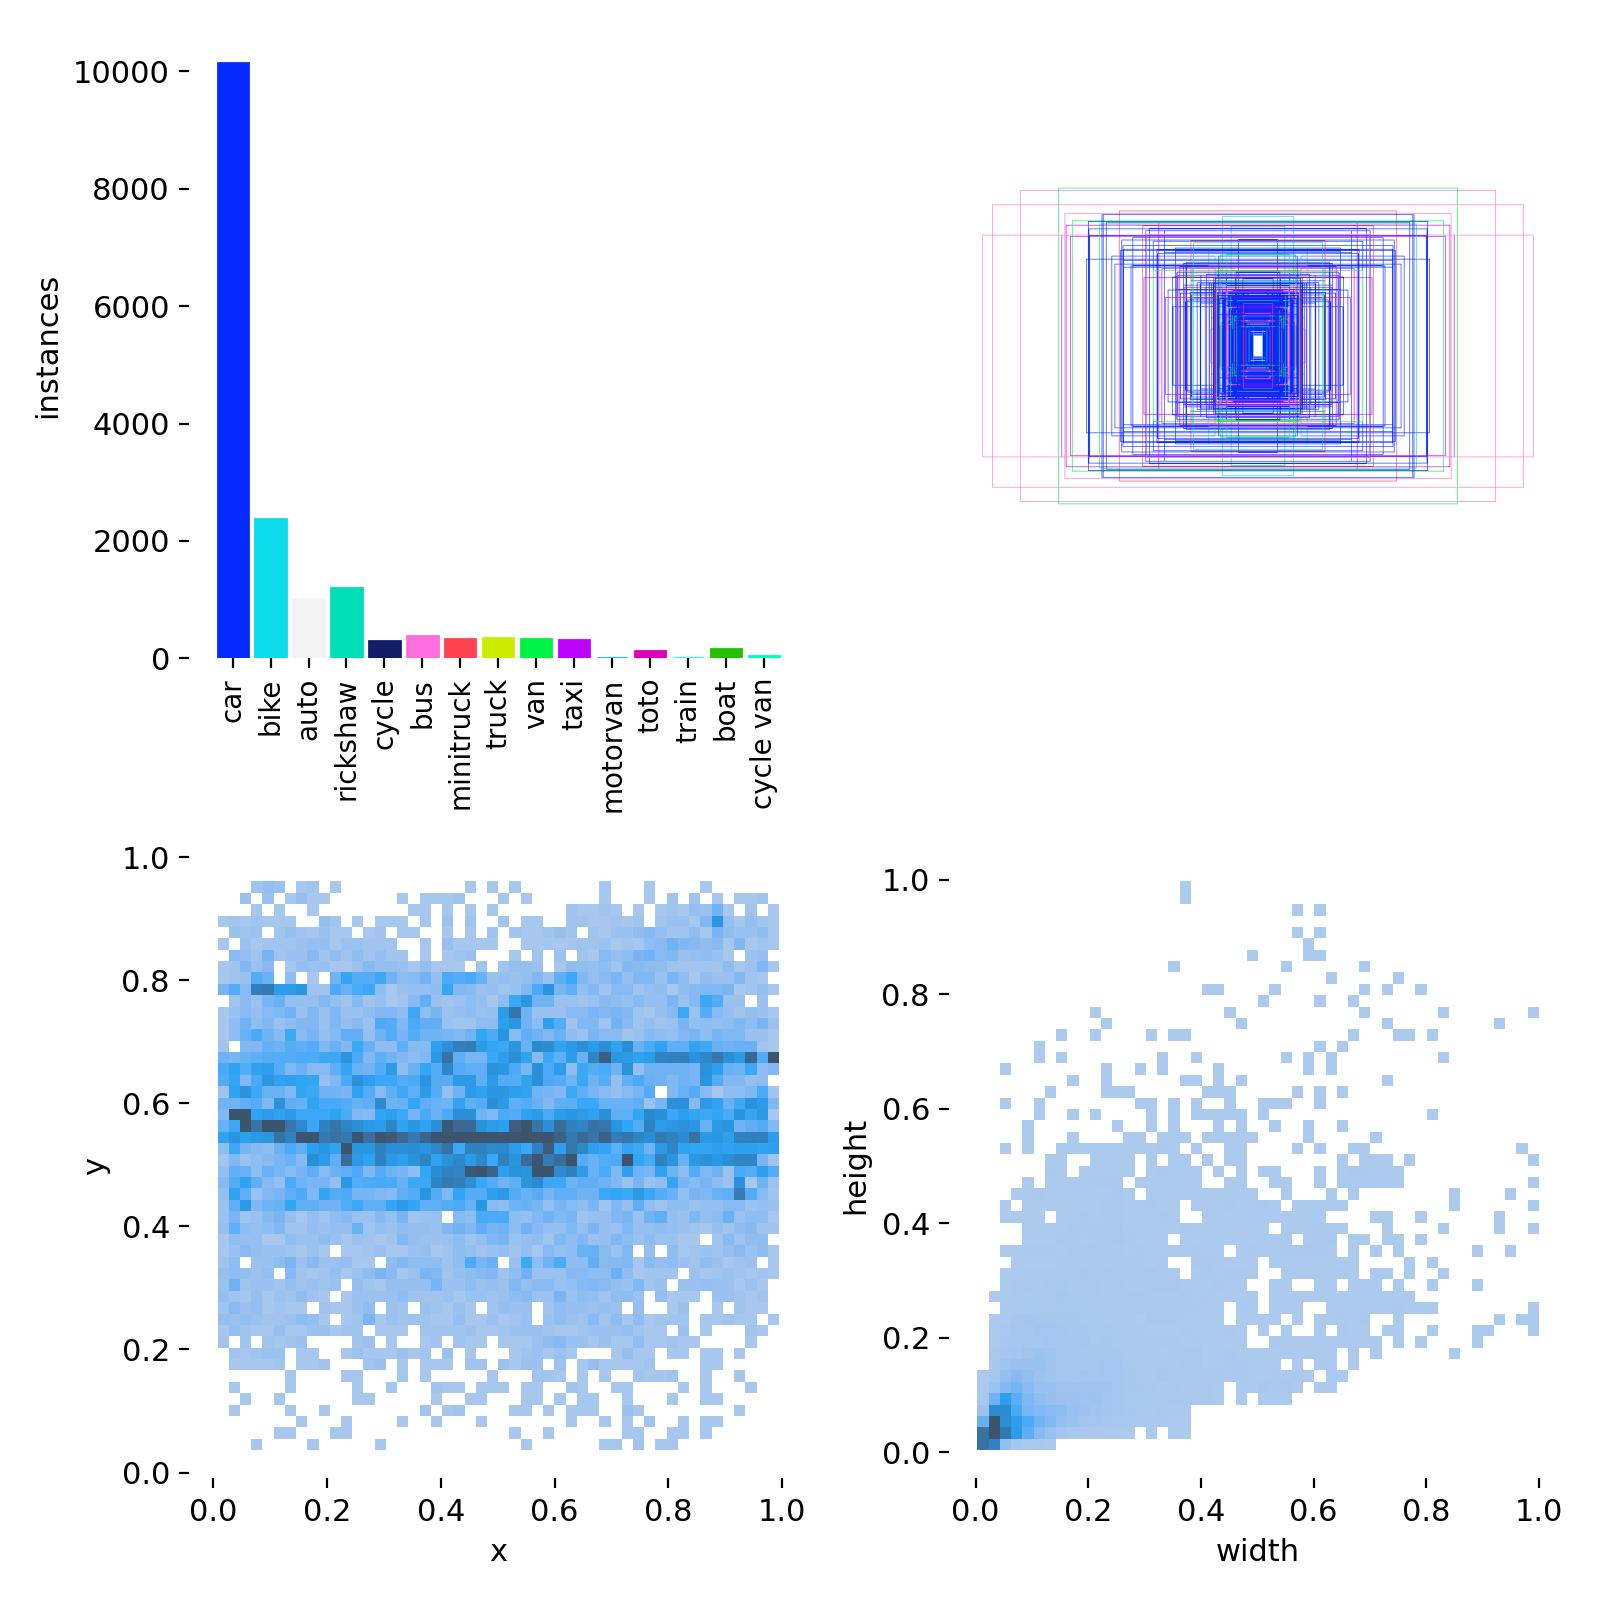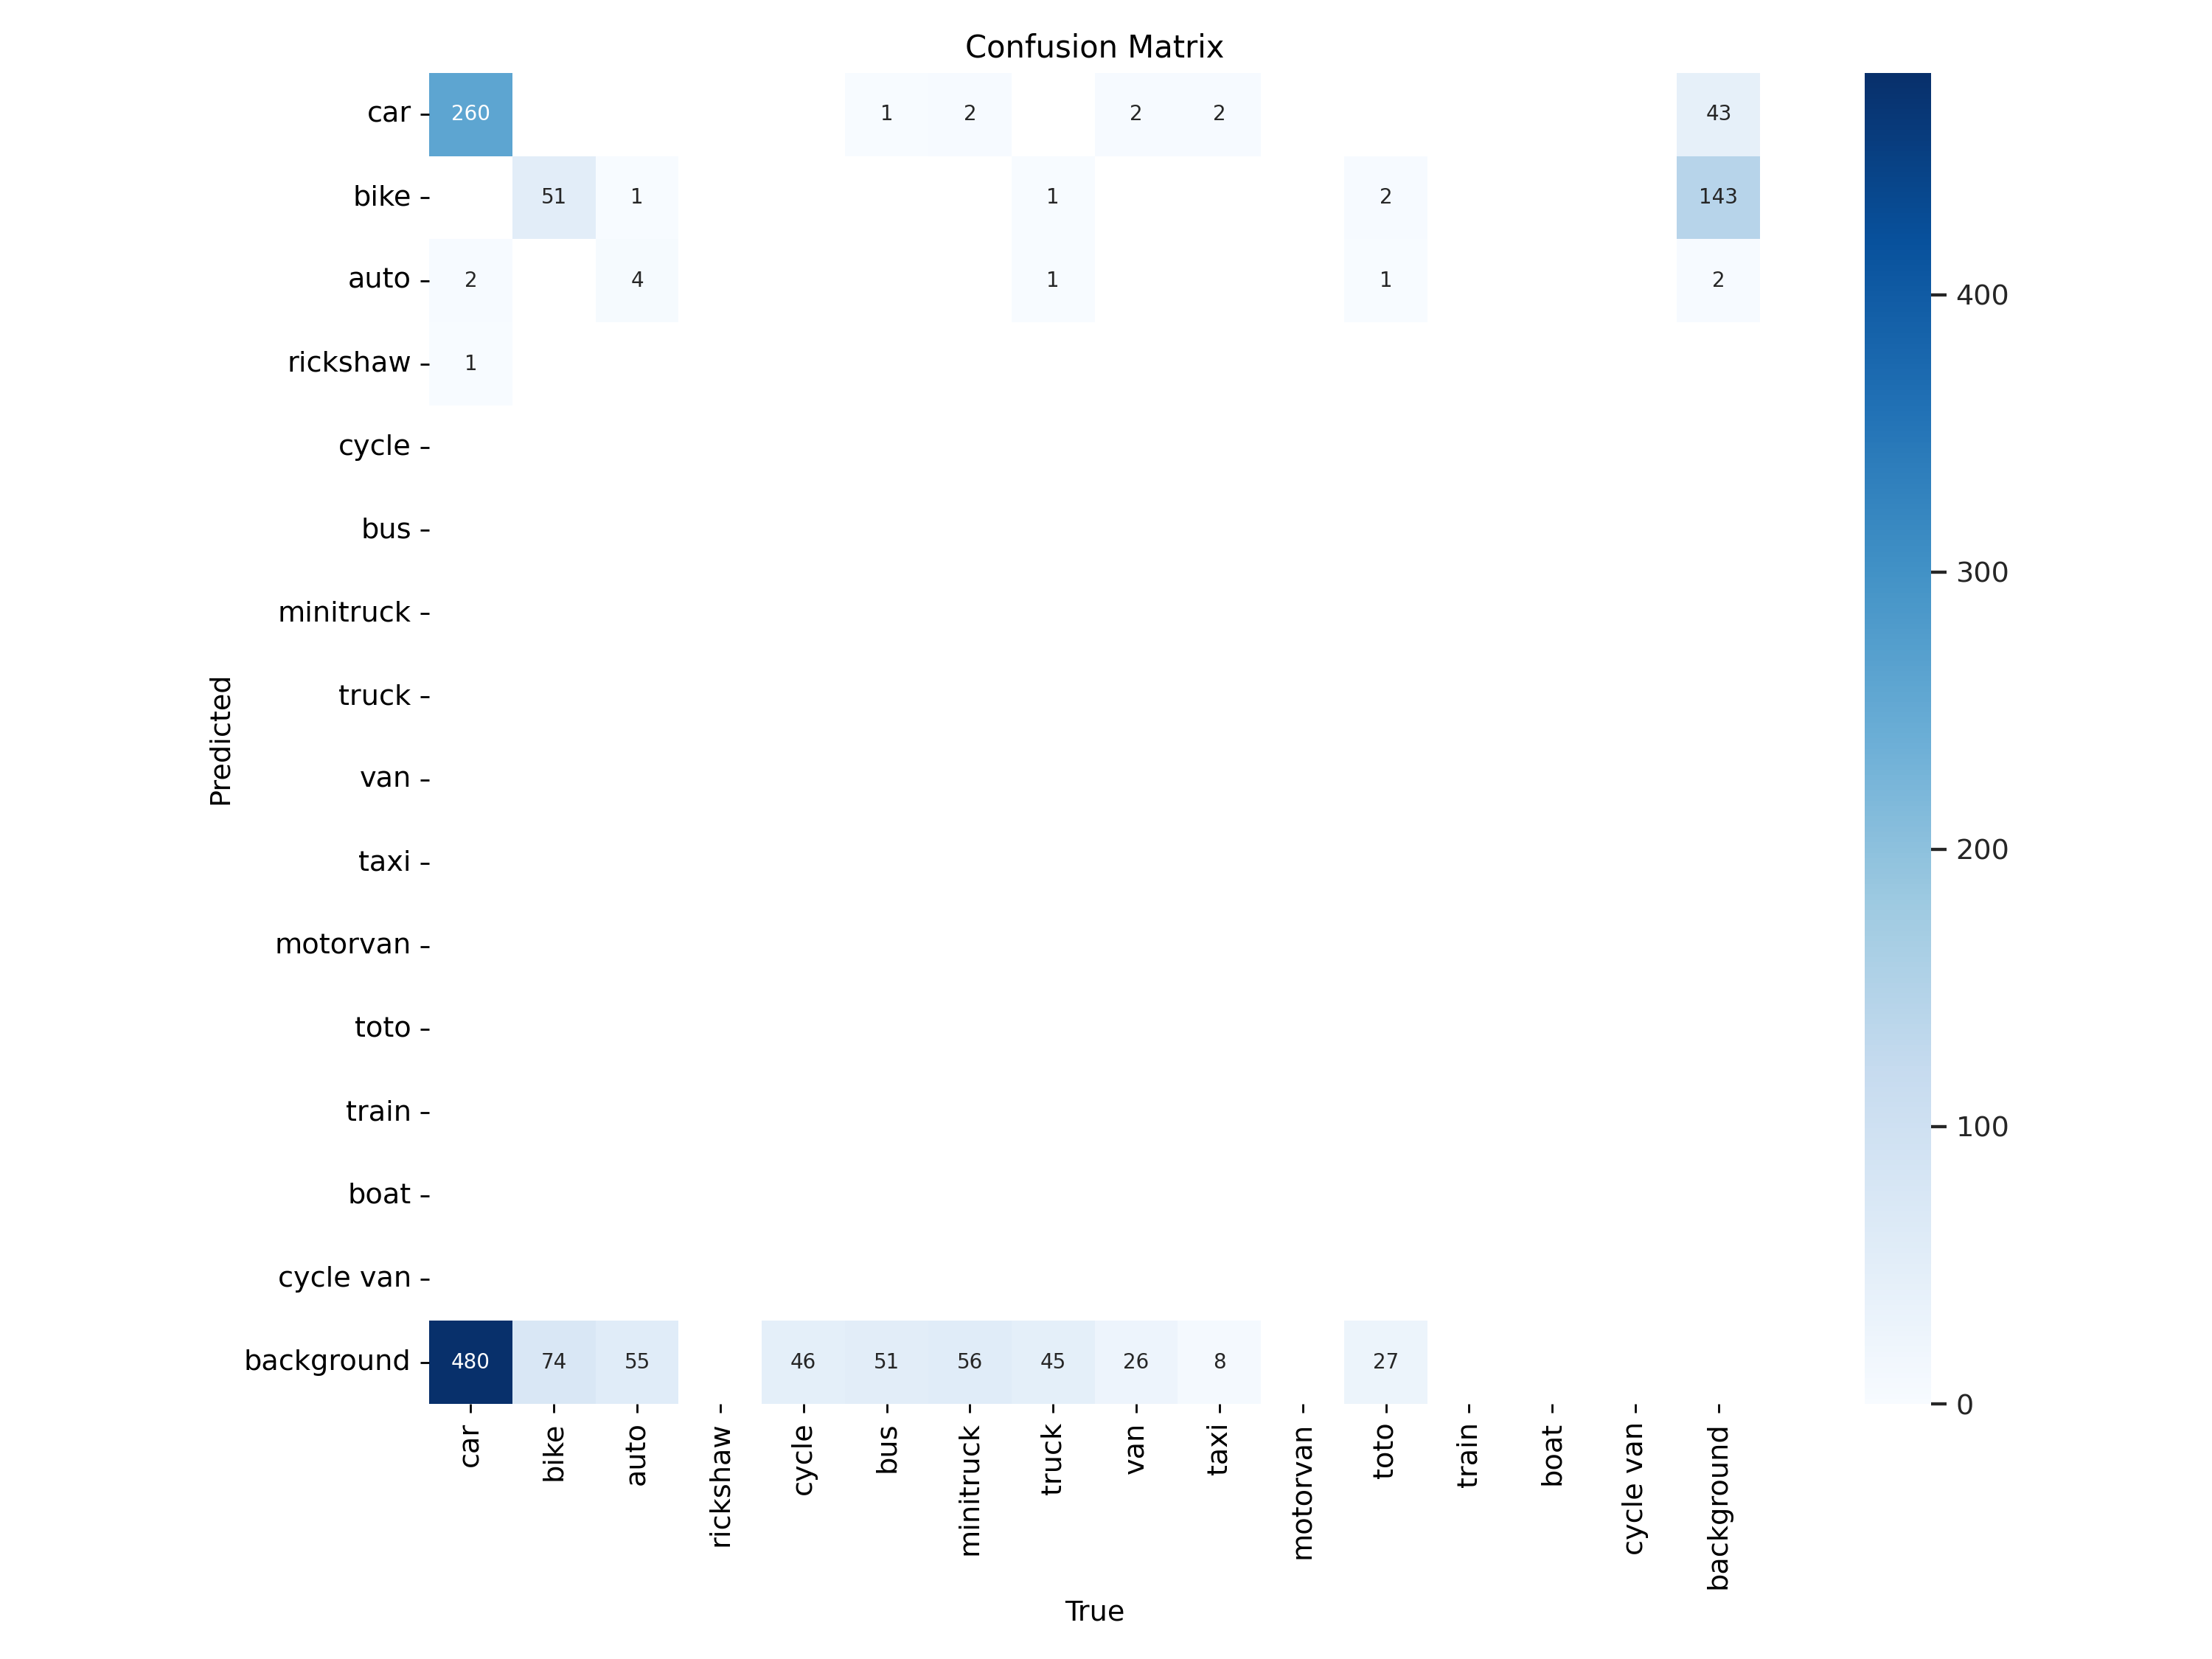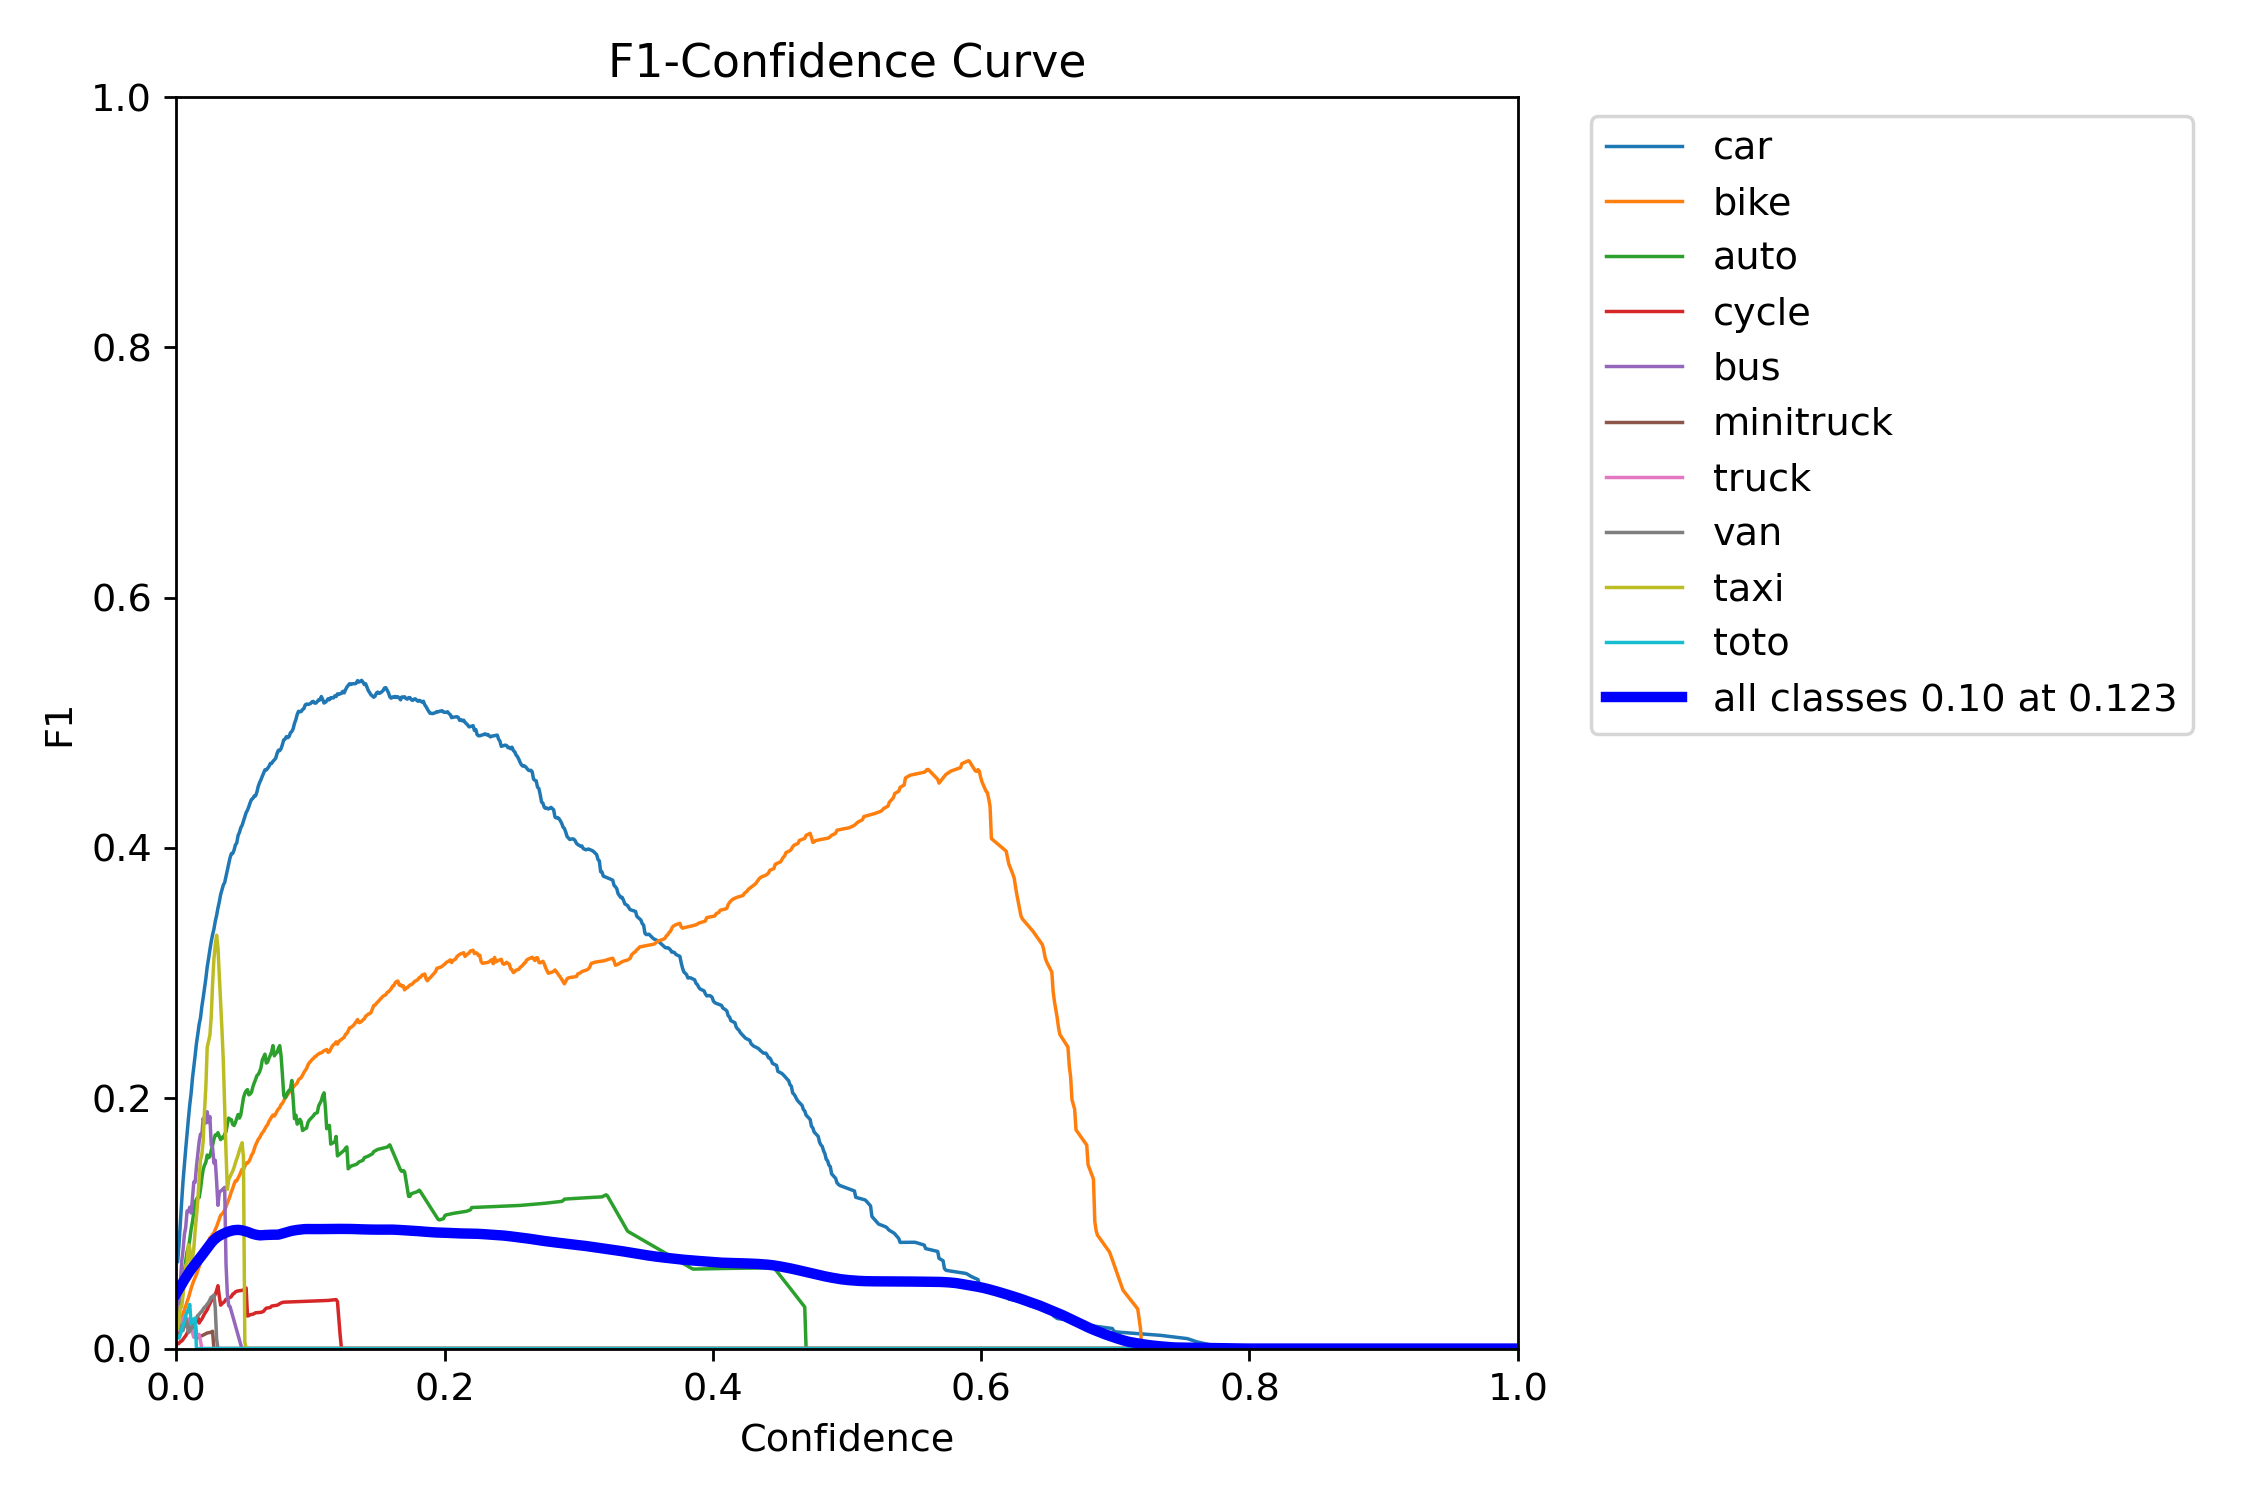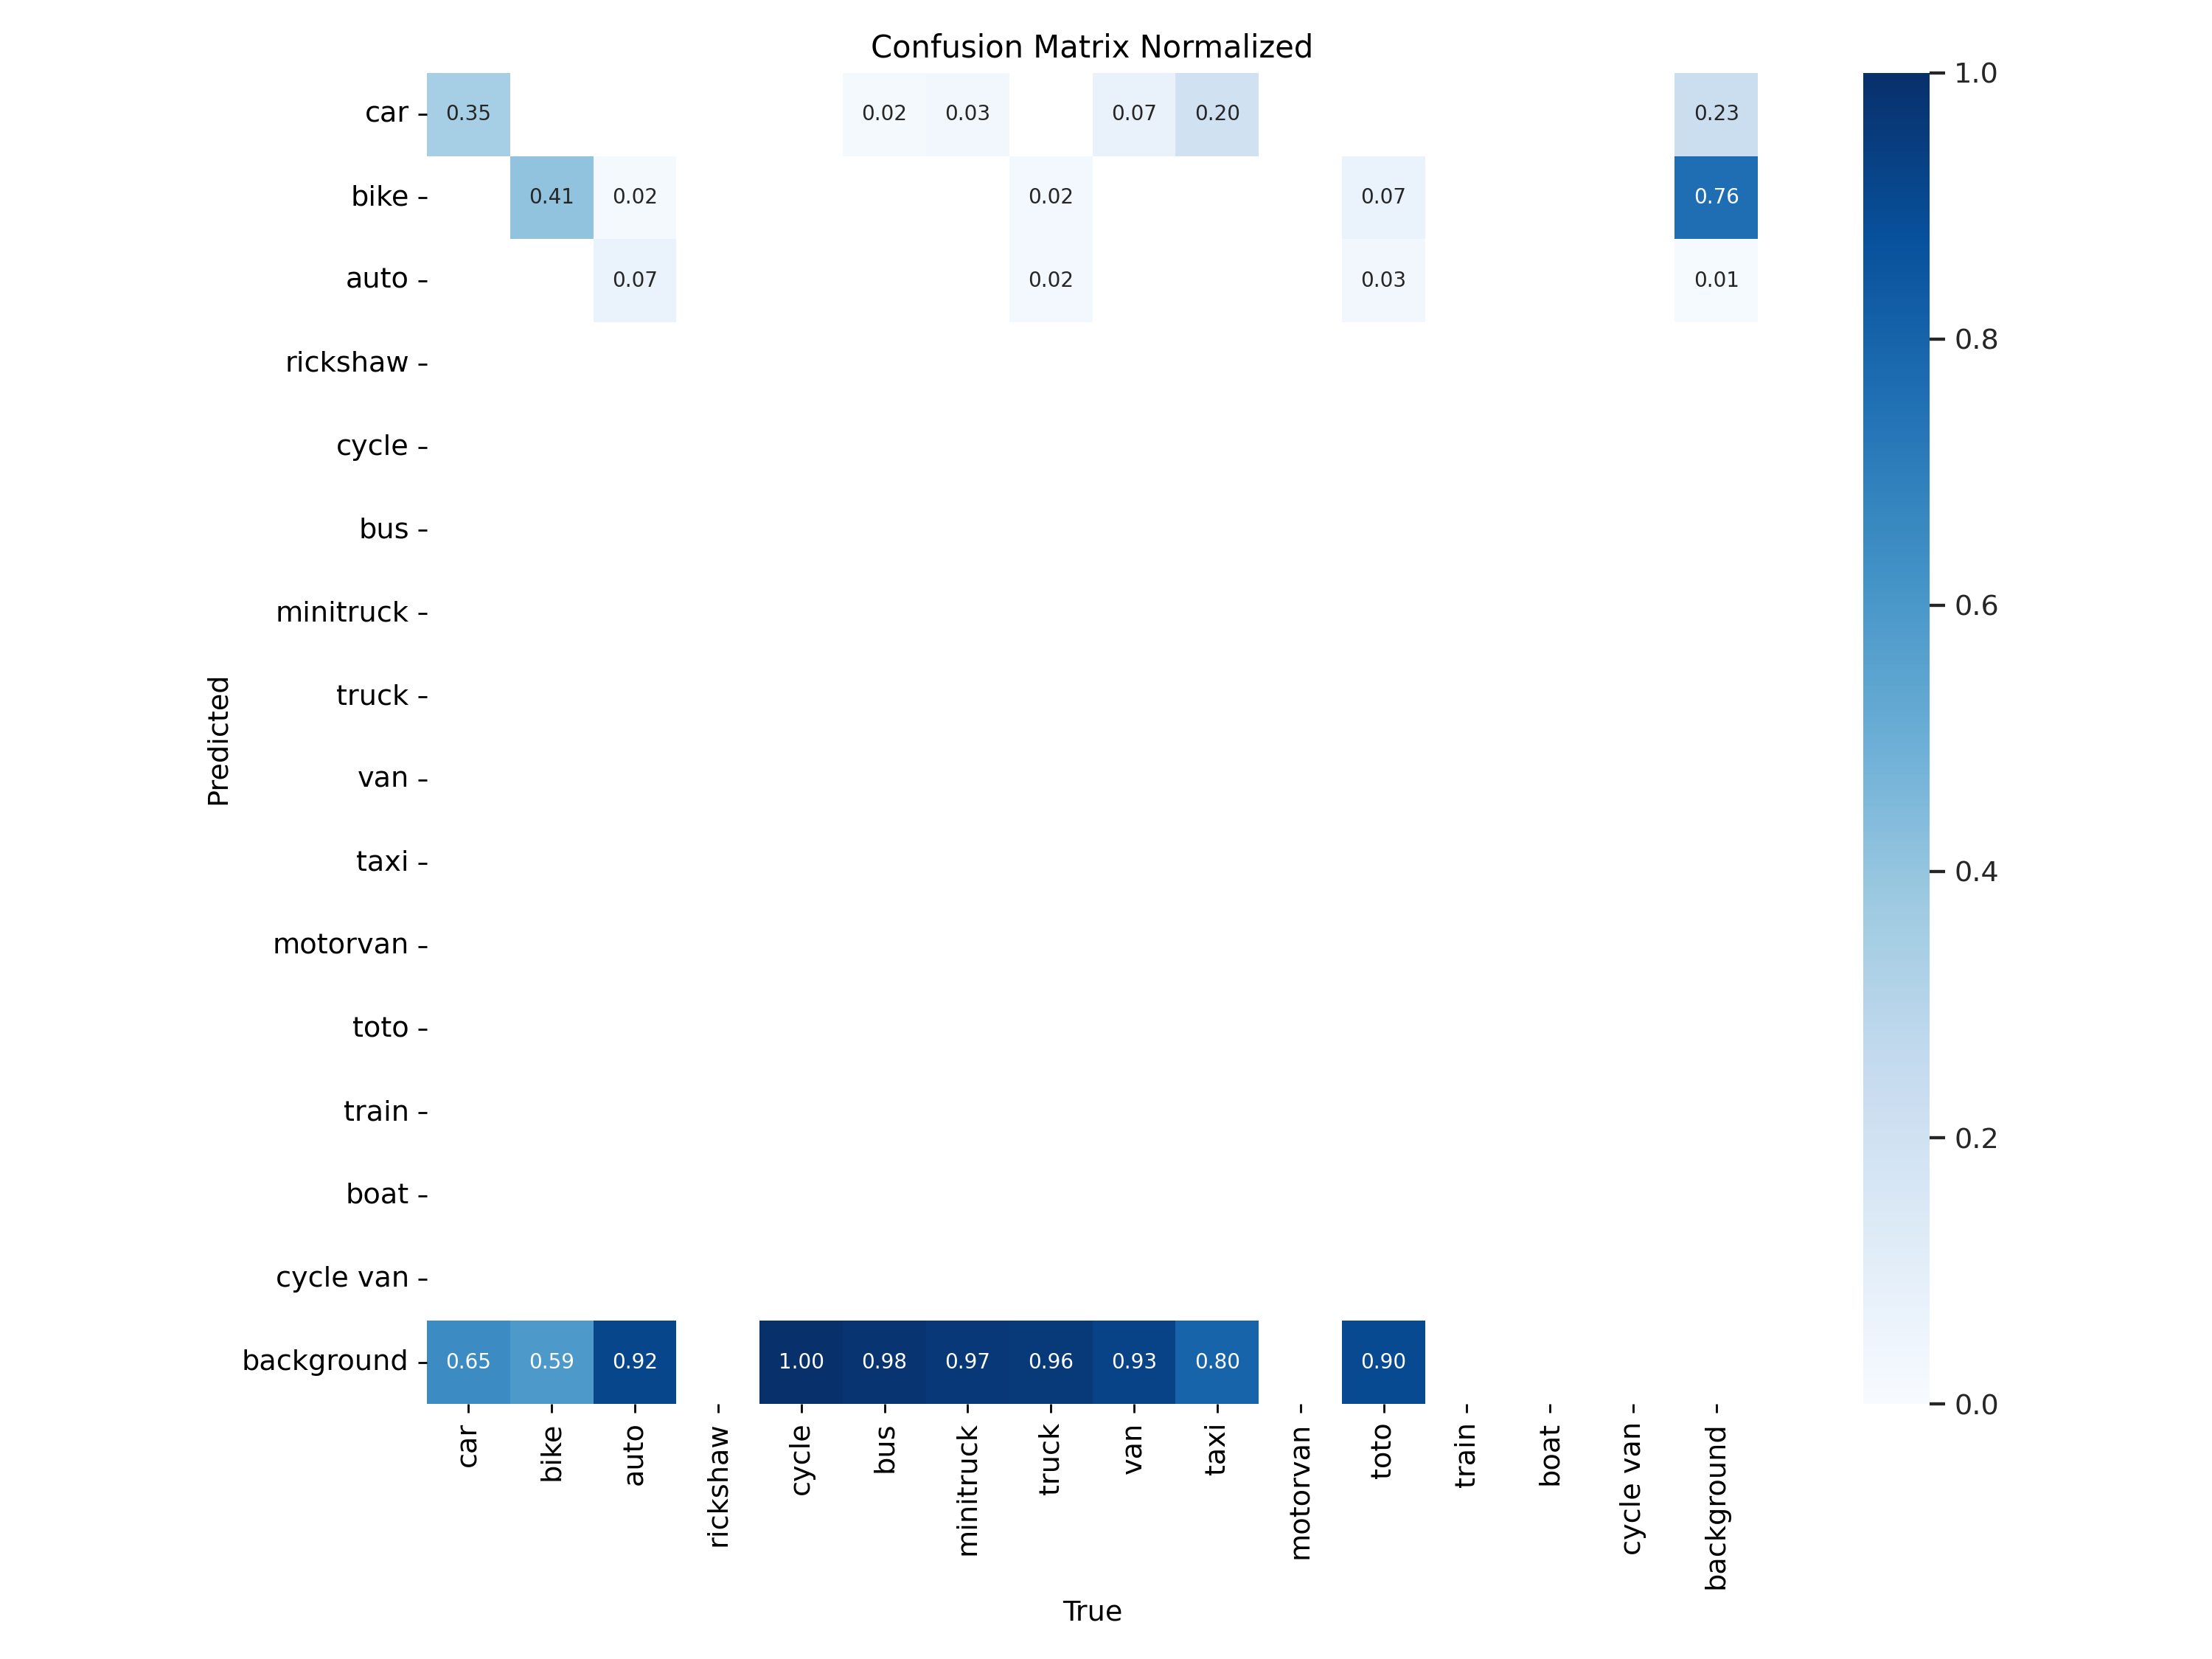